# California 2045
---
Plots in the slide deck presented to Nathan on 11/27/2018 have been generated through this notebook.

[Base Case](#base)
1. [Chart](#base_chart)
2. [Stacked plots](#base_stack)
3. [Curtailment plots](#base_curtailment)


[California 2020](#ca2020)
1. [Chart](#ca2020_chart)
2. [Stacked plots](#ca2020_stack)
3. [Curtailment plots](#ca2020_curtailment)


[Congestion 2020](#congestion2020)
1. [Chart](#congestion2020_chart)
2. [Stacked plots](#congestion2020_stack)
3. [Curtailment plots](#comgestion2020_curtailment)


[California 2030](#ca2030)
1. [Chart](#ca2030_chart)
2. [Stacked plots](#ca2030_stack)
3. [Curtailment plots](#ca2030_curtailment)


[Congestion 2030](#congestion2030)
1. [Chart](#congestion2030_chart)
2. [Stacked plots](#congestion2030_stack)
3. [Curtailment plots](#comgestion2030_curtailment)


[West 2020](#west2020)
1. [Chart](#west2020_chart)
2. [Stacked plots](#west2020_stack)
3. [Curtailment plots](#west2020_curtailment)


[West 2030](#west2030)
1. [Chart](#west2030_chart)
2. [Stacked plots](#west2030_stack)
3. [Curtailment plots](#west2030_curtailment)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from postreise.process import transferdata as td
from postreise.plot.analyze_pg import AnalyzePG as apg
from westernintnet.westernintnet import win_data

c:\program files\python\python36\lib\site-packages\matplotlib\__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


Loading sub
Loading bus2sub
Loading bus
Loading genbus
Loading branches
Loading resources
Loading net_generation
Done loading


In [2]:
od = td.OutputData()

Use  C:\Users\brdo\scenario_data\  to save/load local scenario data.


In [3]:
def get_plant_id(zone, resource):
    plant_id = []
    if zone == 'Western':
        try:
            plant_id = win_data.genbus.groupby('type').get_group(resource).index.values.tolist()
        except KeyError:
            pass
    elif zone == 'California':
        CA = ['Bay Area', 'Central California', 'Northern California',
                'Southeast California', 'Southwest California']
        for load_zone in CA:
            try:
                plant_id += win_data.genbus.groupby(['ZoneName', 'type']).get_group(
                    (load_zone, resource)).index.values.tolist()
            except KeyError:
                pass
    else:
        try:
            plant_id = win_data.genbus.groupby(['ZoneName', 'type']).get_group(
                (zone, resource)).index.values.tolist()
        except KeyError:
            pass
    
    return plant_id

## Base Case
<a id="base"></a>
Multiperiod  
Solar power: SAM  
demand v3  
No multiplier for any of the generator in the grid

In [4]:
win_data.read_demand_data('v3')
win_data.read_solar_data('sam')
win_data.read_wind_data()

Load demand data
Load solar data
Load wind data


In [5]:
multiplier = pd.DataFrame({'multiplier': [1]*len(win_data.genbus)}, index=win_data.genbus.index.values)

In [6]:
pg = od.get_data('western_scenario_Update01', 'PG')

### 1. Charts
<a id="base_chart"></a>

Set UTC for all zones


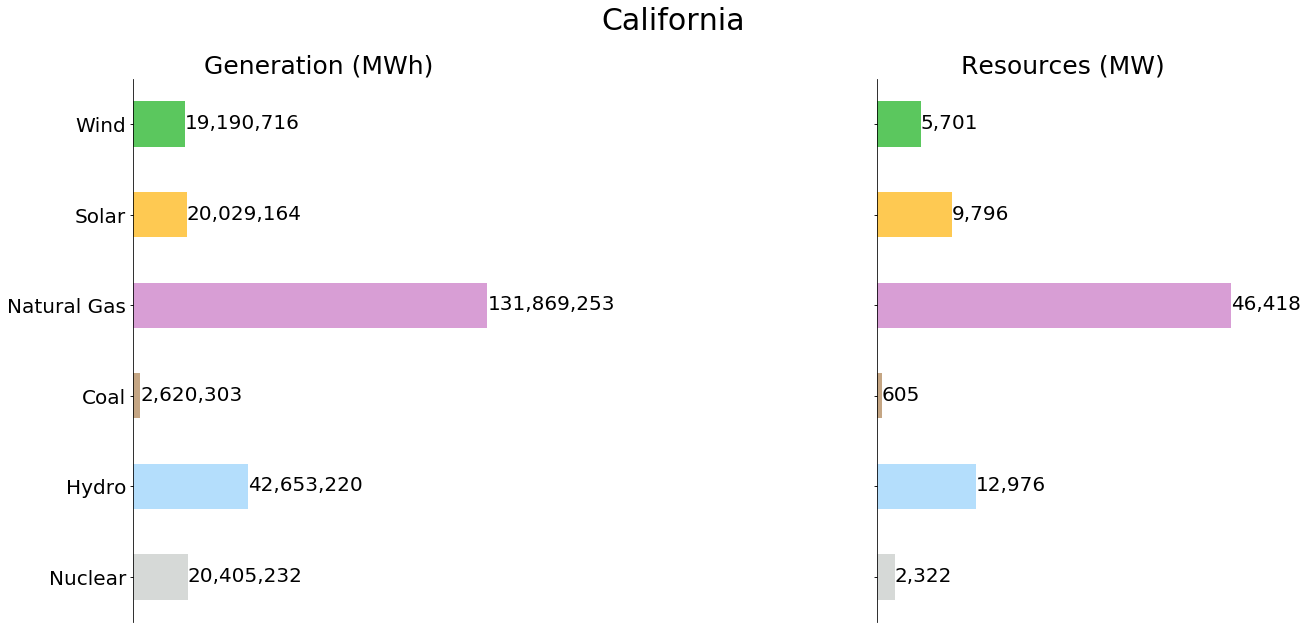

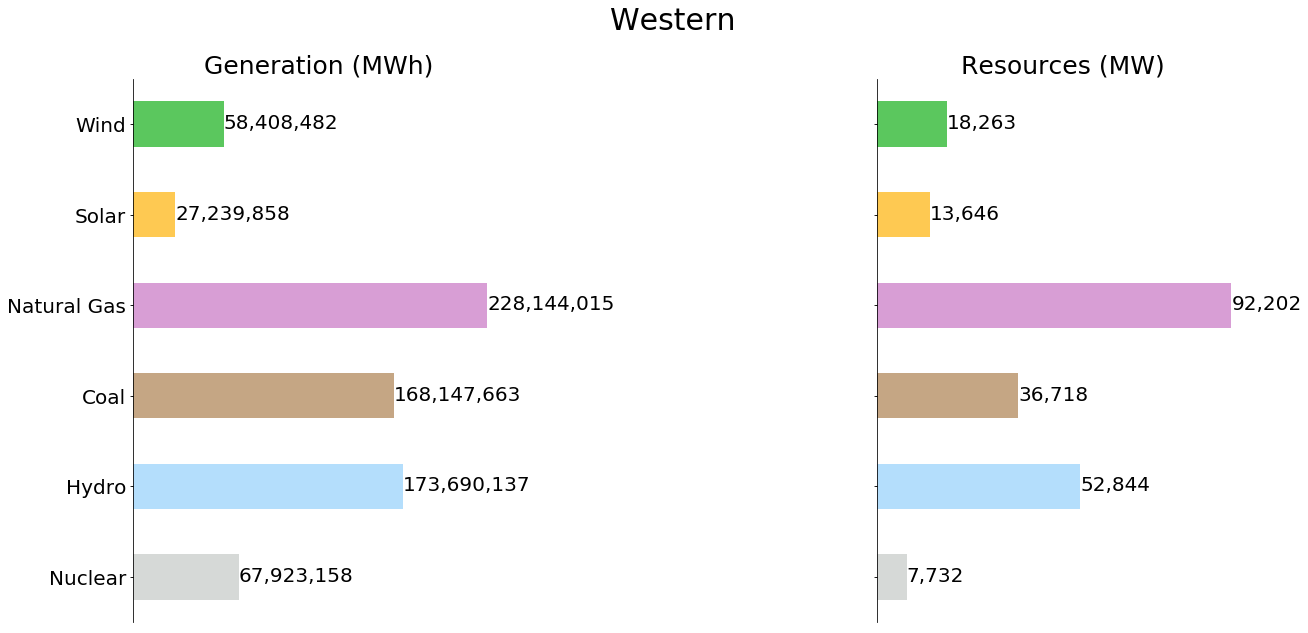

Total Generation in Western Interconnection: 723553316 MWh
Total Capacity in Western Interconnection: 221409 MW


In [7]:
chart = apg((pg, win_data, multiplier),
            ('2016-01-01-00', '2016-12-31-23', 'utc', 'H'),
            ['California', 'Western'],
            ['nuclear', 'hydro', 'coal', 'ng', 'solar', 'wind'],
            'chart', normalize=False)
chart.get_plot(save=False)
data_chart = chart.get_data()
print("Total Generation in Western Interconnection: %d MWh" % round(data_chart['Western']['Generation'].sum().sum()))
print("Total Capacity in Western Interconnection: %d MW" % round(data_chart['Western']['Capacity'].sum()))

### 2. Stacked plots
<a id="base_stack"></a>

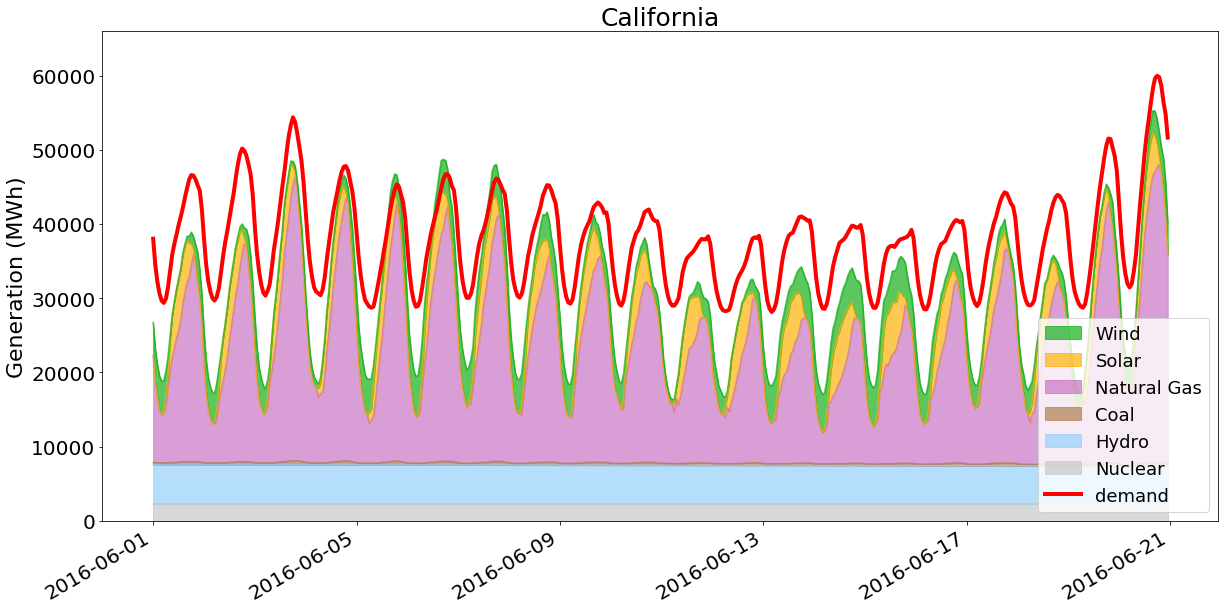

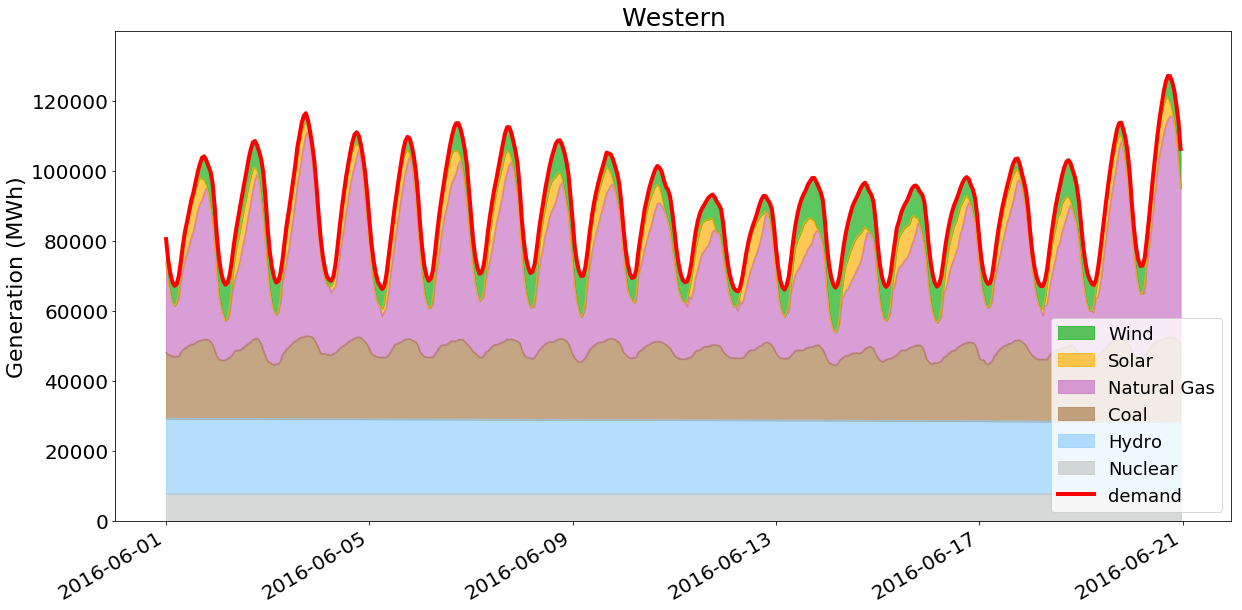

Generation in the Western interconnection in MWh:
84796212.77713576


In [8]:
stack = apg((pg, win_data, multiplier),
            ('2016-06-01-00', '2016-06-20-23', 'local', 'H'),
            ['California', 'Western'],
            ['nuclear', 'coal', 'ng', 'hydro', 'wind', 'solar'],
            'stacked', normalize=False)
stack.get_plot(save=False)
data_stack = stack.get_data()
print("Generation in the Western interconnection in MWh:")
print(data_stack['Western'].sum().sum())

### 3. Curtailment plots
<a id="base_curtailment"></a>

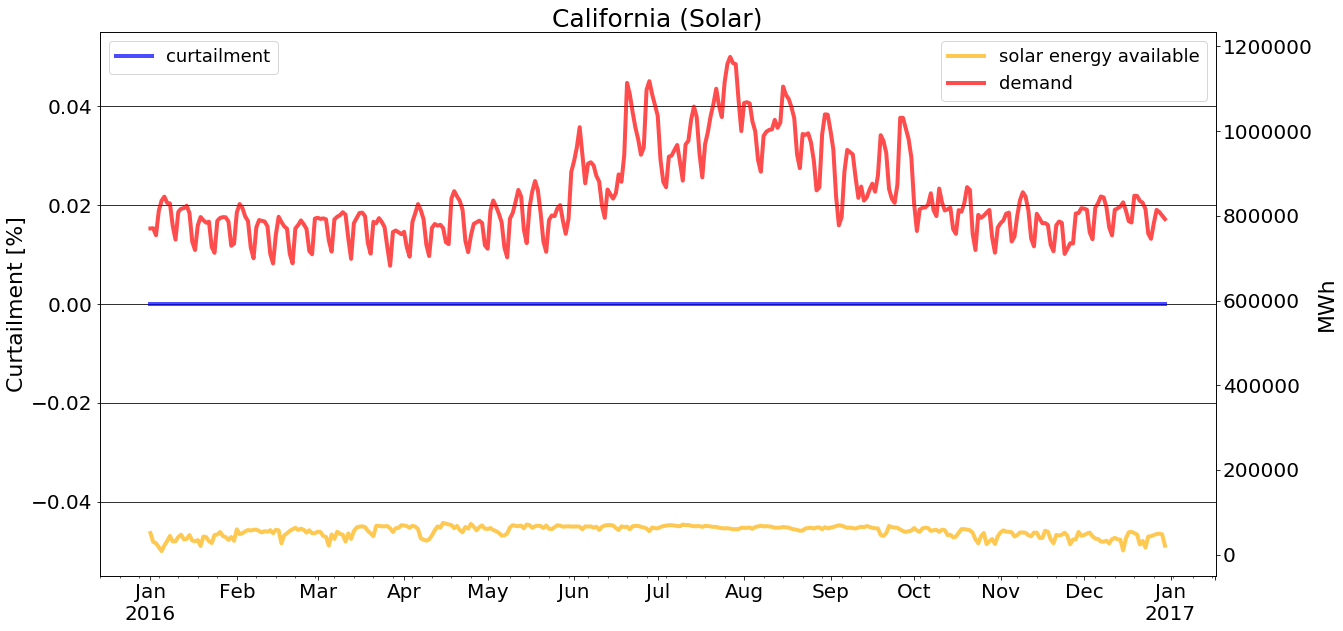

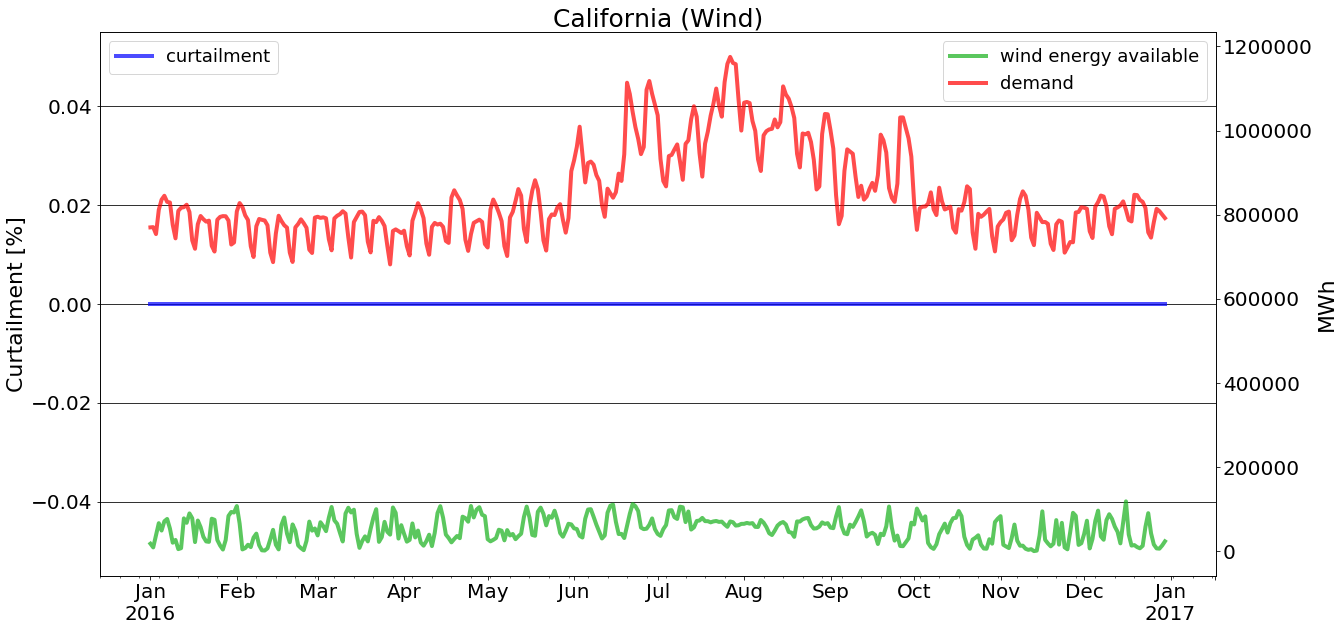

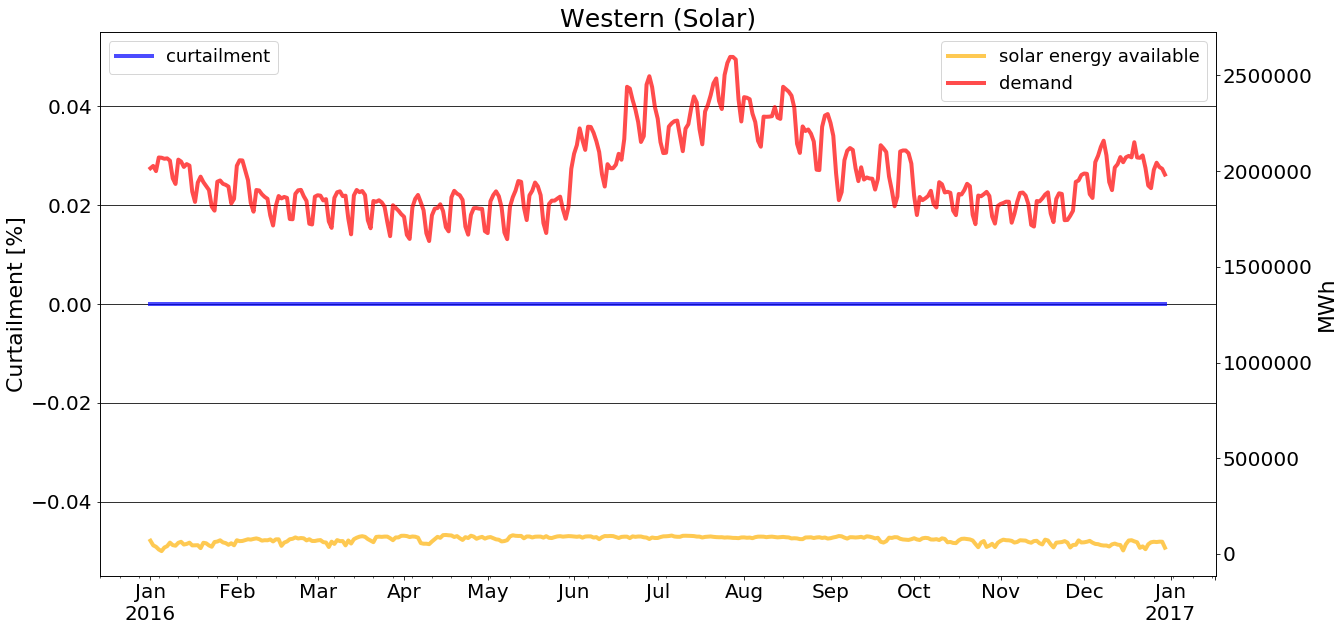

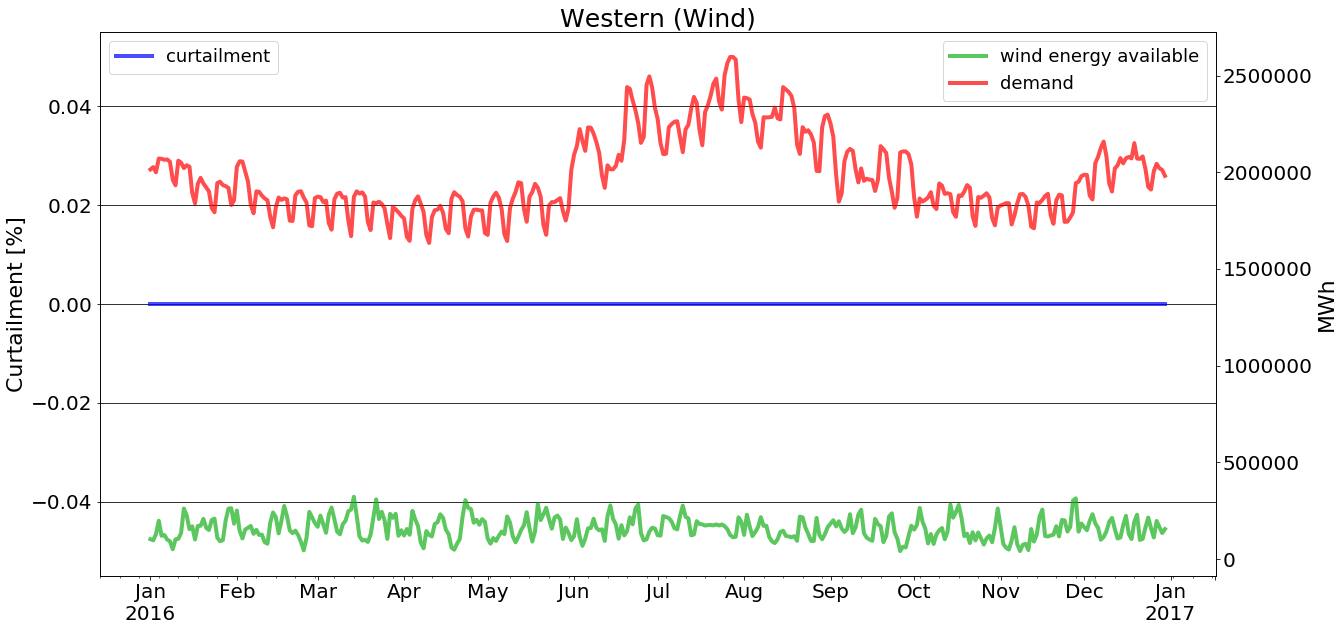

Maximum curtailment for solar generators in the Western Interconnection: 0 %
Maximum curtailment for wind generators in the Western Interconnection: 0 %


In [9]:
curtailment = apg((pg, win_data, multiplier),
                  ('2016-01-01-00', '2016-12-31-23', 'local', 'D'),
                  ['California', 'Western'],
                  ['solar', 'wind'],
                  'curtailment', normalize=False)
curtailment.get_plot(save=False)
data_curtailment = curtailment.get_data()
print("Maximum curtailment for solar generators in the Western Interconnection: %d %%" % 
      round(data_curtailment['Western']['solar'].curtailment.max()))
print("Maximum curtailment for wind generators in the Western Interconnection: %d %%" % 
      round(data_curtailment['Western']['wind'].curtailment.max()))

## California 2020
<a id="ca2020"></a>
Multiperiod  
Solar power: SAM  
demand v3  
multiplier: 1.52 for solar power output in CA and 1.48 for wind power output in CA.

In [10]:
win_data.read_demand_data('cal2020')
win_data.read_solar_data('sam')
win_data.read_wind_data()

Load demand data
Load solar data
Load wind data


In [11]:
factor = [1.52, 1.48]
multiplier = pd.DataFrame({'multiplier': [1]*len(win_data.genbus)}, index=win_data.genbus.index.values)
for i, resource in enumerate(['solar', 'wind']):
    plant_id = get_plant_id('California', resource)
    multiplier.loc[plant_id] = factor[i]

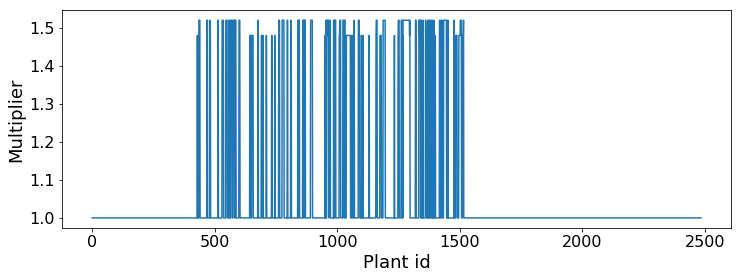

In [12]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(12,4))

ax = fig.gca()
multiplier.plot(ax=ax, legend=False)
ax.set_xlabel('Plant id', fontsize=18)
ax.set_ylabel('Multiplier', fontsize=18)
ax.tick_params(labelsize=16)
plt.show()

In [13]:
pg = od.get_data('california2020Test01', 'PG')

### 1. Charts
<a id="ca2020_chart"></a>

Set UTC for all zones


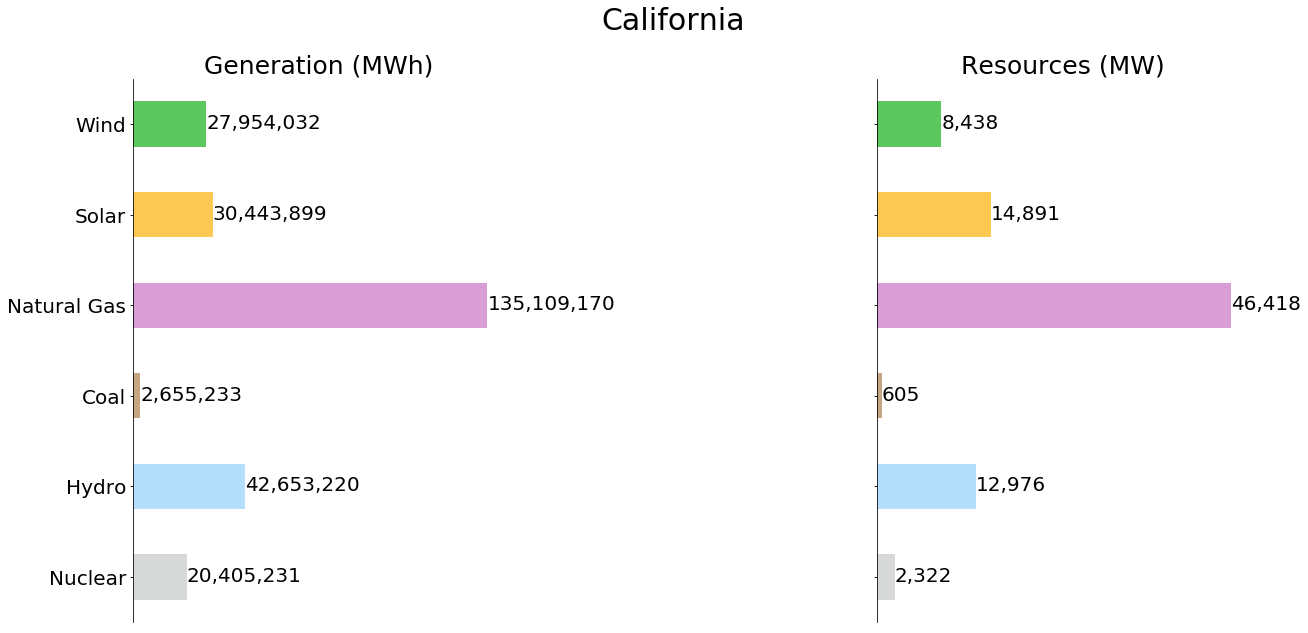

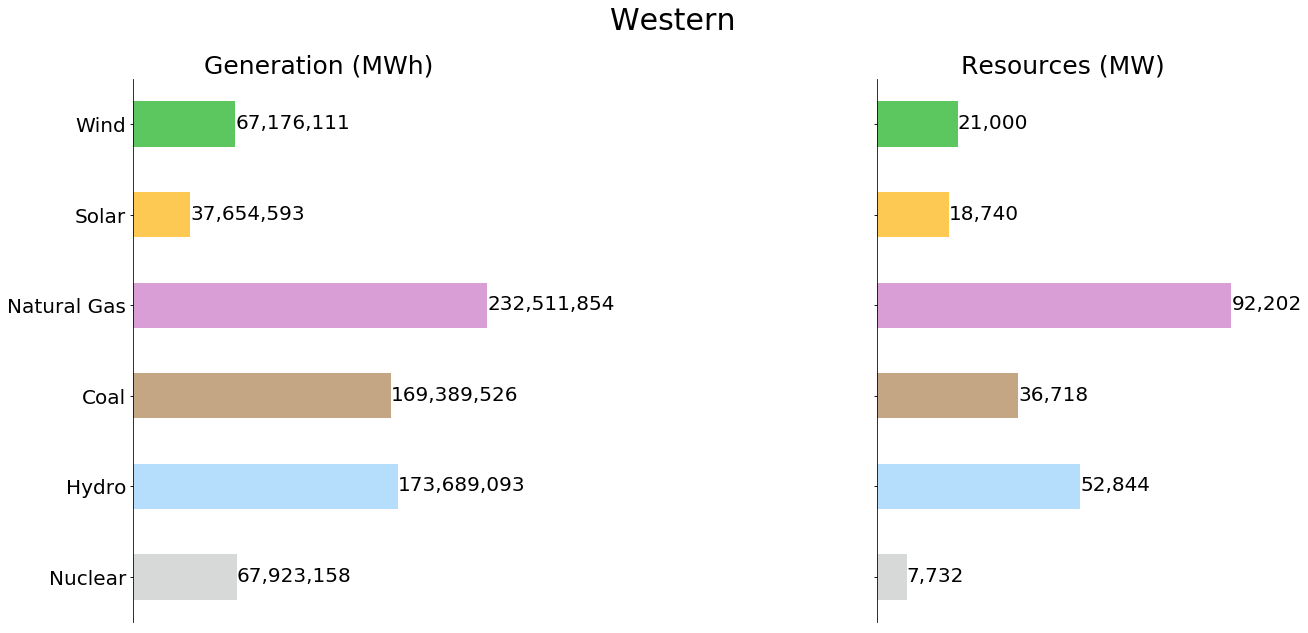

Total Generation in Western Interconnection: 748344338 MWh
Total Capacity in Western Interconnection: 229240 MW


In [14]:
chart = apg((pg, win_data, multiplier),
            ('2016-01-01-00', '2016-12-31-23', 'utc', 'H'),
            ['California', 'Western'],
            ['nuclear', 'hydro', 'coal', 'ng', 'solar', 'wind'],
            'chart', normalize=False)
chart.get_plot(save=False)
data_chart = chart.get_data()
print("Total Generation in Western Interconnection: %d MWh" % round(data_chart['Western']['Generation'].sum().sum()))
print("Total Capacity in Western Interconnection: %d MW" % round(data_chart['Western']['Capacity'].sum()))

### 2. Stacked Plots
<a id="ca2020_stack"></a>

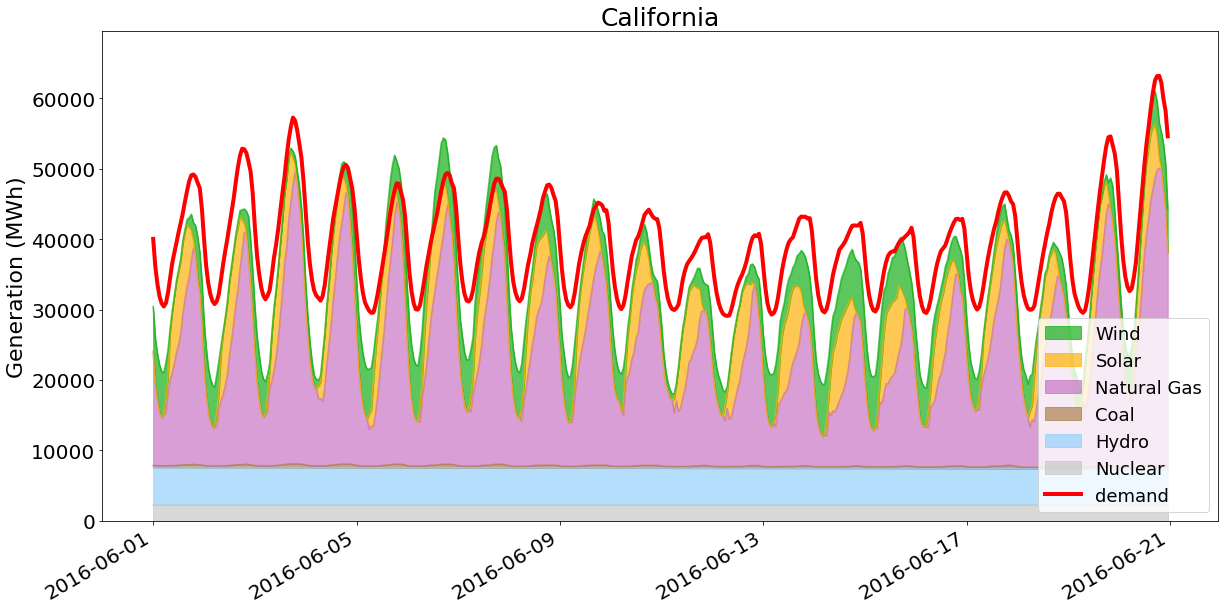

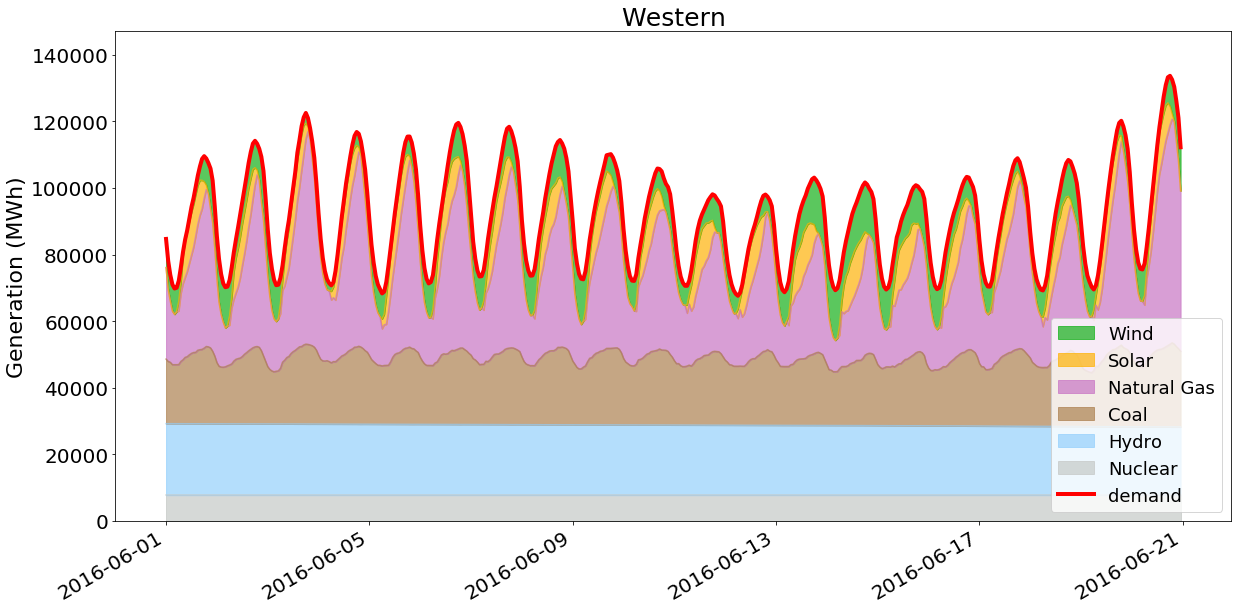

Generation in the Western interconnection in MWh:
88388034.28572135


In [15]:
stack = apg((pg, win_data, multiplier),
            ('2016-06-01-00', '2016-06-20-23', 'local', 'H'),
            ['California', 'Western'],
            ['nuclear', 'coal', 'ng', 'hydro', 'wind', 'solar'],
            'stacked', normalize=False)
stack.get_plot(save=False)
data_stack = stack.get_data()
print("Generation in the Western interconnection in MWh:")
print(data_stack['Western'].sum().sum())

### 3. Curtailment Plots
<a id="ca2020_curtailment"></a>

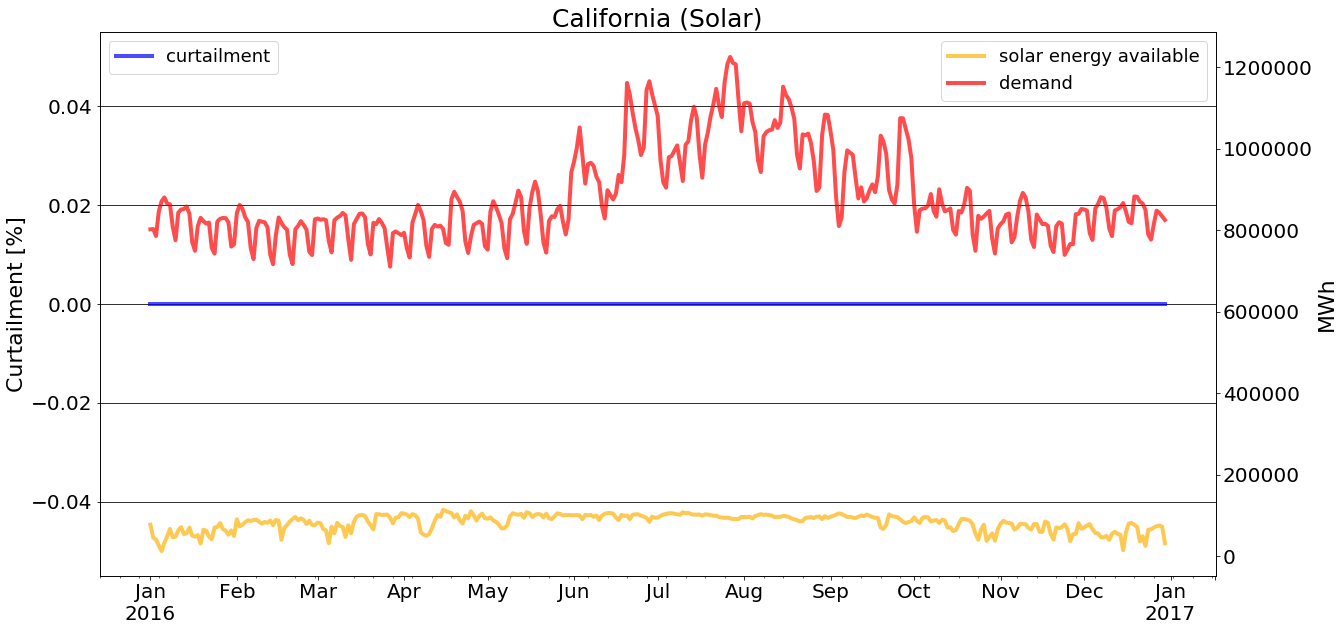

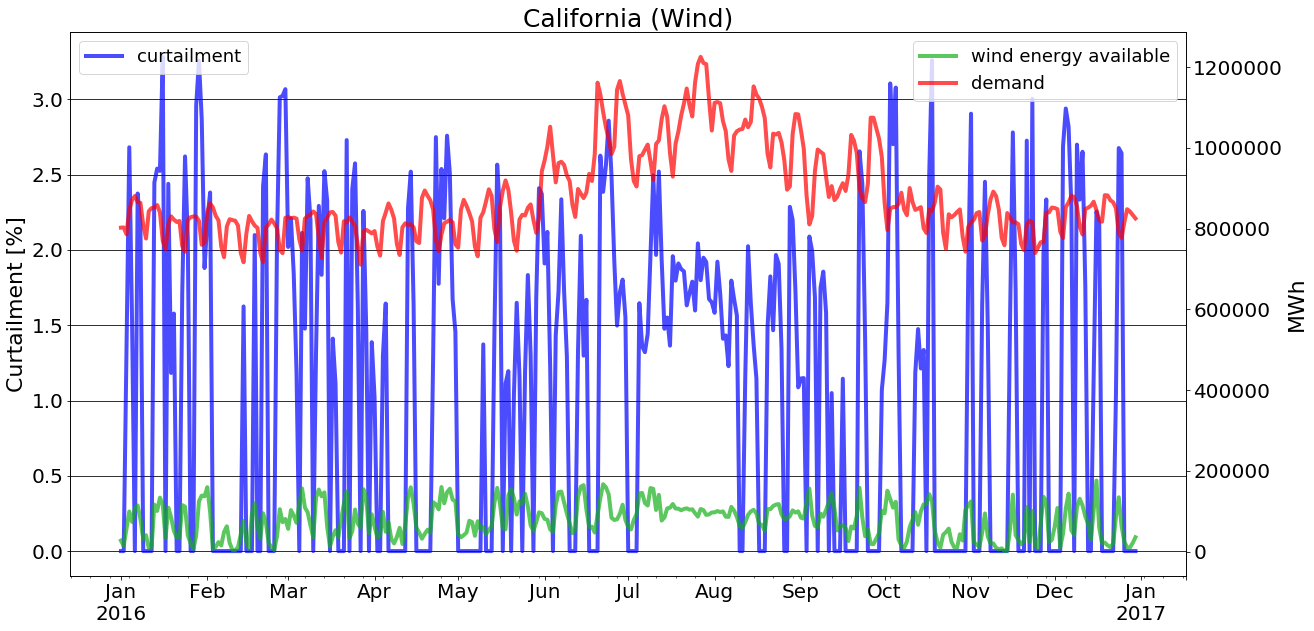

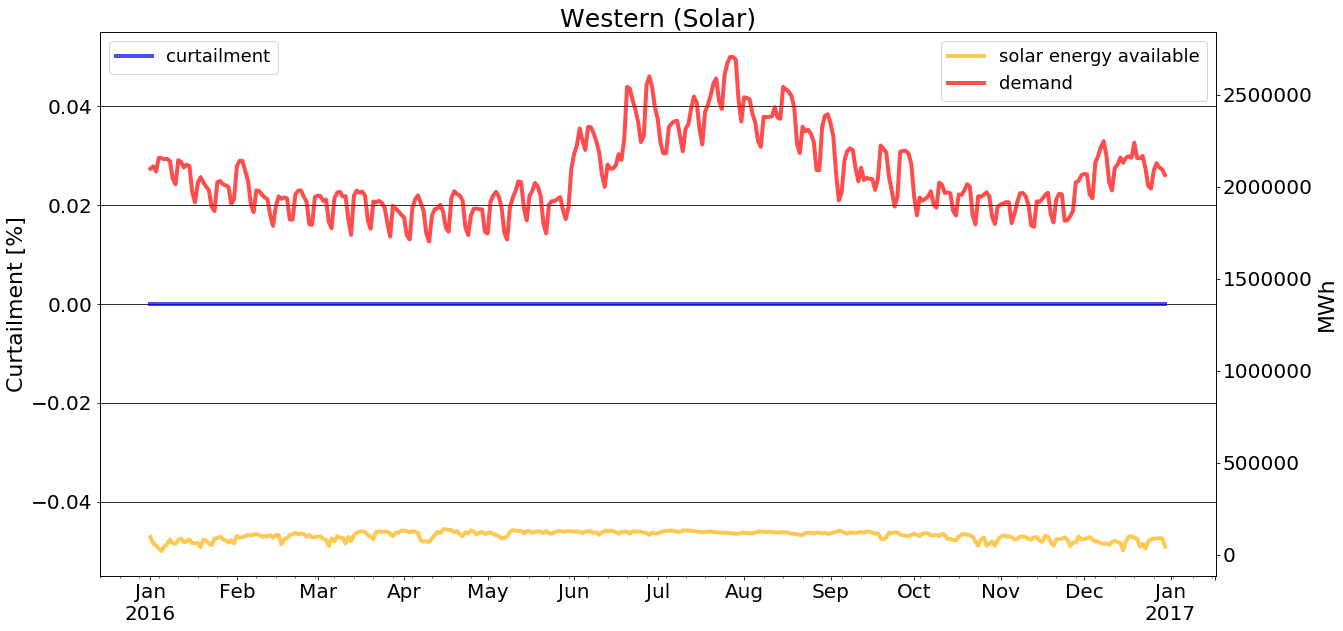

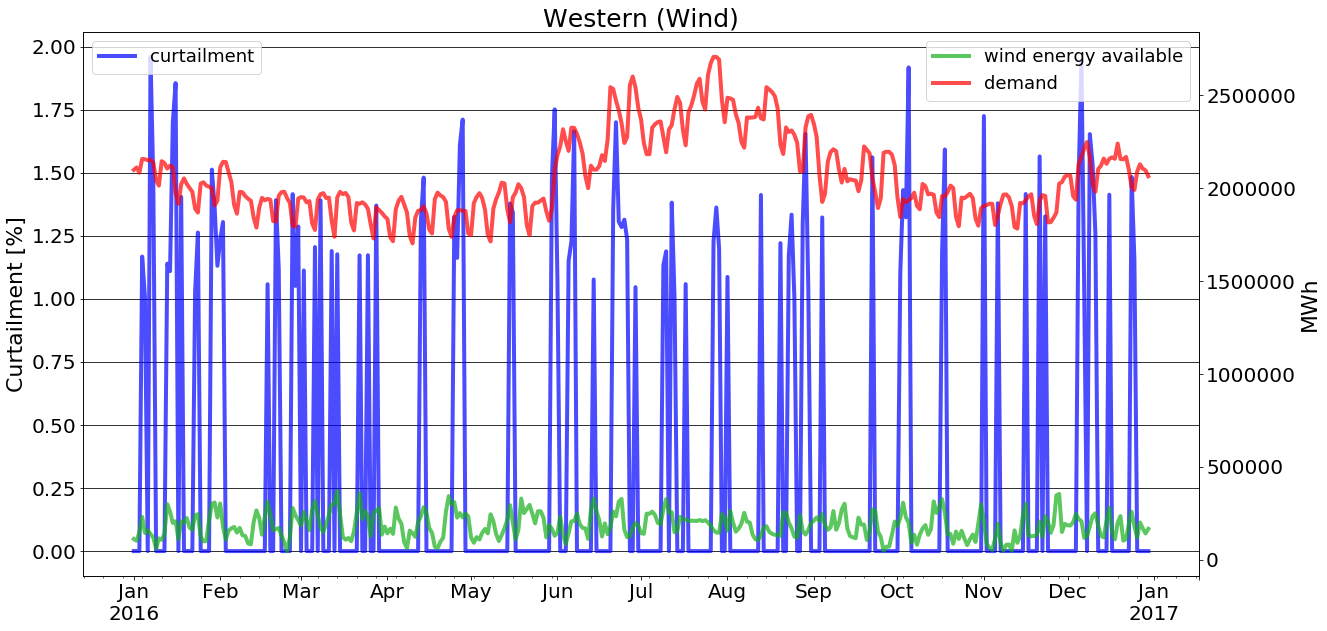

In [16]:
curtailment = apg((pg, win_data, multiplier),
                  ('2016-01-01-00', '2016-12-31-23', 'local', 'D'),
                  ['California', 'Western'],
                  ['solar', 'wind'],
                  'curtailment', normalize=False)
curtailment.get_plot(save=False)
data_curtailment = curtailment.get_data()

In [17]:
for zone in ['California', 'Western']:
    for resource in ['solar', 'wind']:
        available = data_curtailment[zone][resource].available.sum() 
        generated = data_curtailment[zone][resource].generated.sum()
        curtailment = 100 * (available - generated) / available
        print("Curtailment %s/%s: %.1f %%" % (zone, resource, curtailment))

Curtailment California/solar: 0.0 %
Curtailment California/wind: 1.6 %
Curtailment Western/solar: 0.0 %
Curtailment Western/wind: 0.7 %


## Congestion 2020
<a id="congestion2020"></a>
Multiperiod  
Solar power: SAM  
demand v3  
multiplier: 1.52 for solar power output in CA and 1.48 for wind power output in CA  
Capacity of congested transmission lines in California: x2

In [18]:
win_data.read_demand_data('cal2020')
win_data.read_solar_data('sam')
win_data.read_wind_data()

Load demand data
Load solar data
Load wind data


In [19]:
factor = [1.52, 1.48]
multiplier = pd.DataFrame({'multiplier': [1]*len(win_data.genbus)}, index=win_data.genbus.index.values)
for i, resource in enumerate(['solar', 'wind']):
    plant_id = get_plant_id('California', resource)
    multiplier.loc[plant_id] = factor[i]

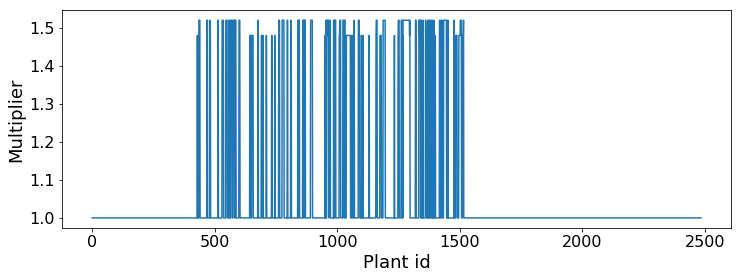

In [20]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(12,4))

ax = fig.gca()
multiplier.plot(ax=ax, legend=False)
ax.set_xlabel('Plant id', fontsize=18)
ax.set_ylabel('Multiplier', fontsize=18)
ax.tick_params(labelsize=16)
plt.show()

In [21]:
pg = od.get_data('california2020_fixCalCong', 'PG')

### 1. Charts
<a id="congestion2020_chart"></a>

Set UTC for all zones


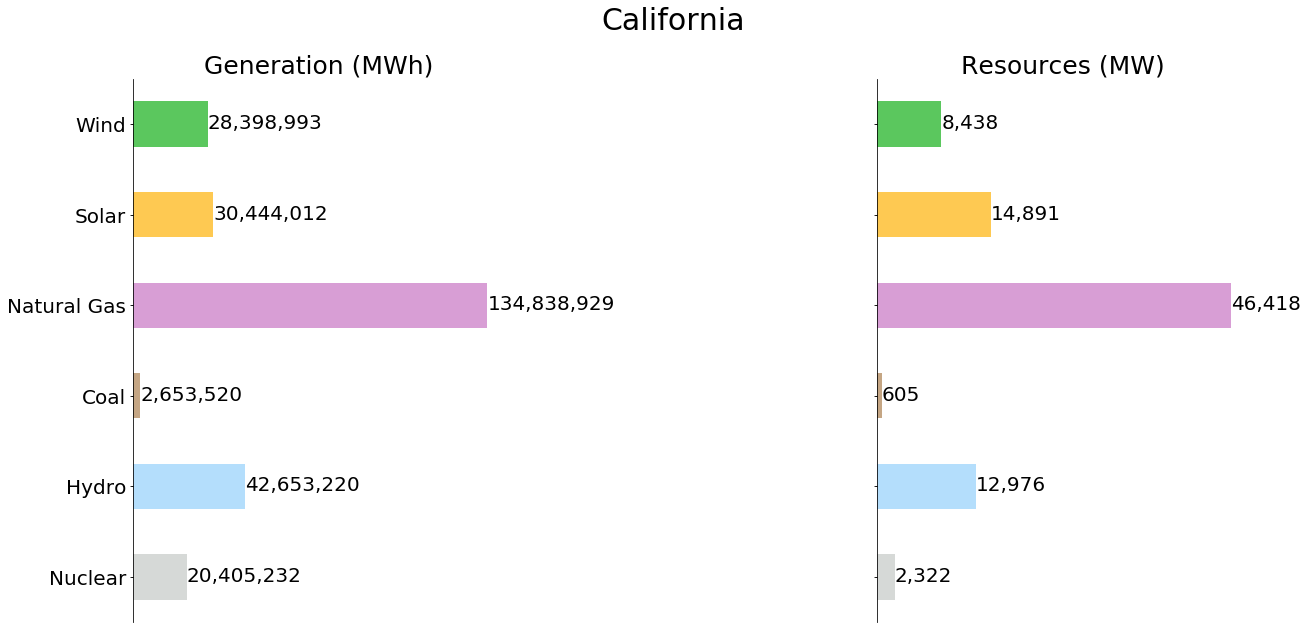

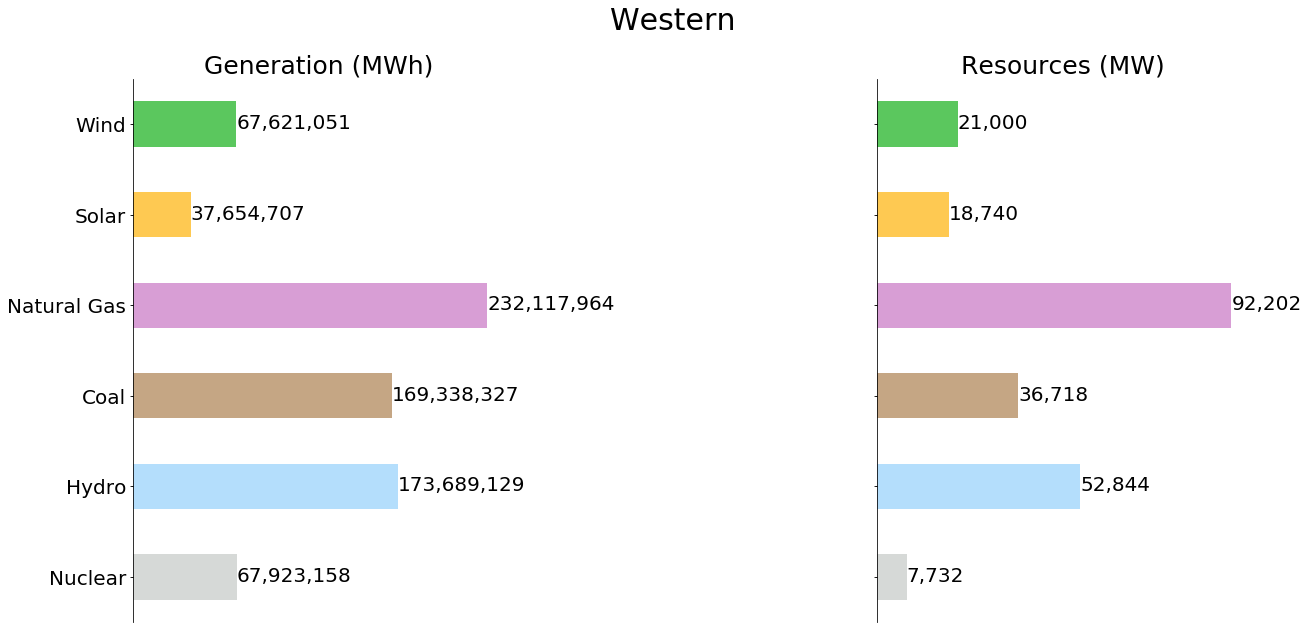

Total Generation in Western Interconnection: 748344338 MWh
Total Capacity in Western Interconnection: 229240 MW


In [22]:
chart = apg((pg, win_data, multiplier),
            ('2016-01-01-00', '2016-12-31-23', 'utc', 'H'),
            ['California', 'Western'],
            ['nuclear', 'hydro', 'coal', 'ng', 'solar', 'wind'],
            'chart', normalize=False)
chart.get_plot(save=False)
data_chart = chart.get_data()
print("Total Generation in Western Interconnection: %d MWh" % round(data_chart['Western']['Generation'].sum().sum()))
print("Total Capacity in Western Interconnection: %d MW" % round(data_chart['Western']['Capacity'].sum()))

### 2. Stacked Plots
<a id="congestion2020_stack"></a>

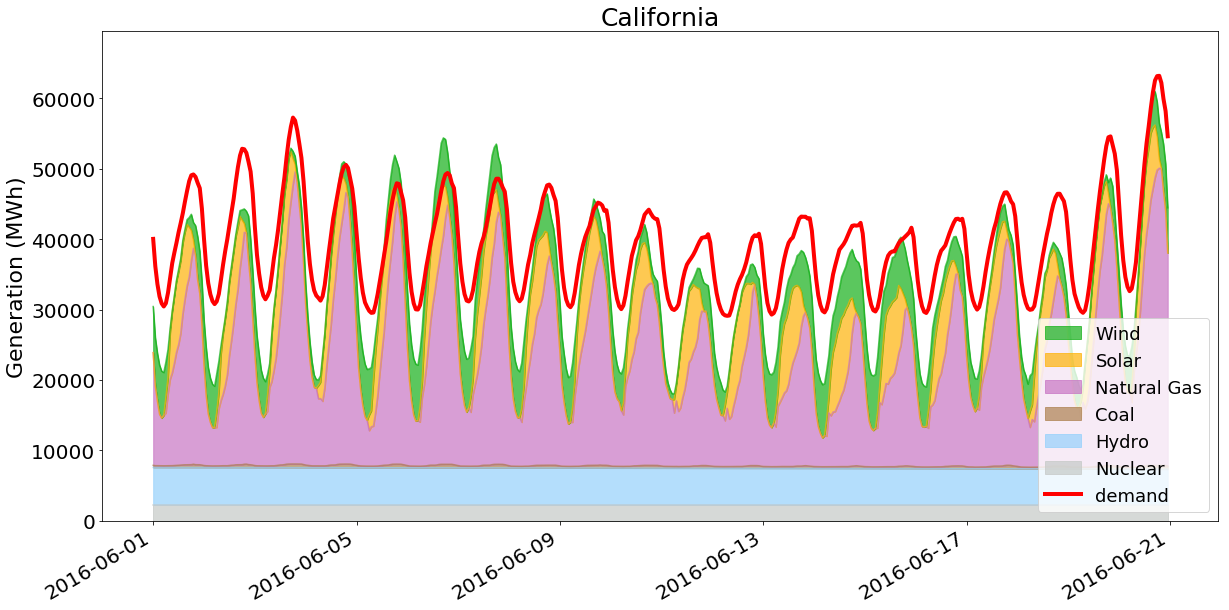

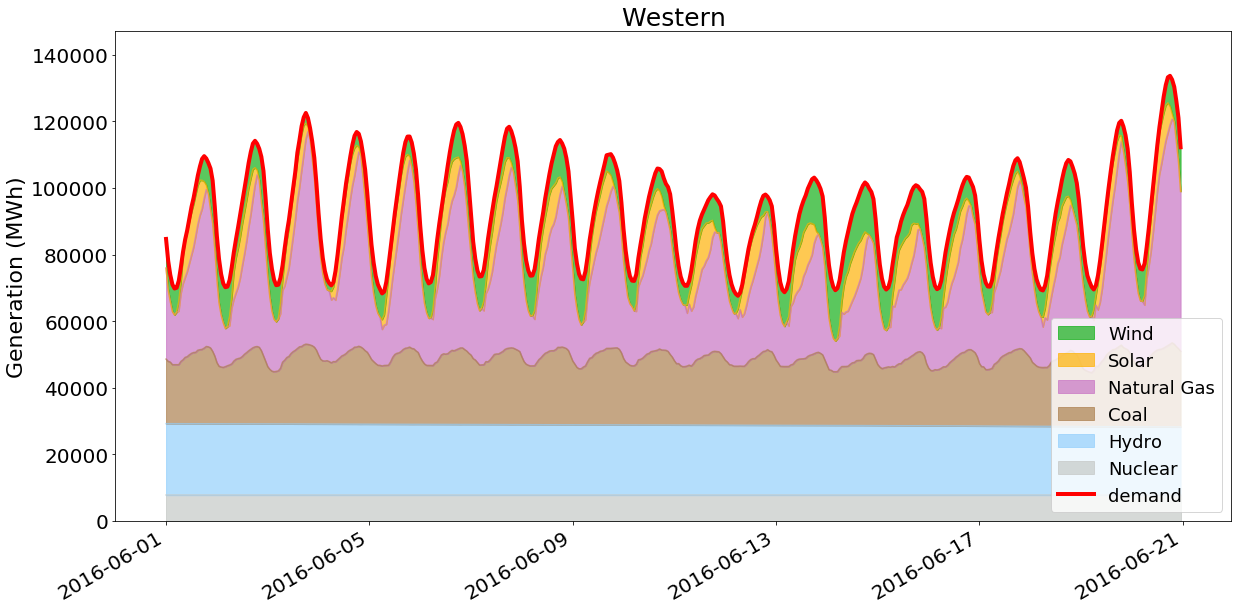

Generation in the Western interconnection in MWh:
88388034.3513776


In [23]:
stack = apg((pg, win_data, multiplier),
            ('2016-06-01-00', '2016-06-20-23', 'local', 'H'),
            ['California', 'Western'],
            ['nuclear', 'coal', 'ng', 'hydro', 'wind', 'solar'],
            'stacked', normalize=False)
stack.get_plot(save=False)
data_stack = stack.get_data()
print("Generation in the Western interconnection in MWh:")
print(data_stack['Western'].sum().sum())

### 3. Curtailment Plots
<a id="congestion2020_curtailment"></a>

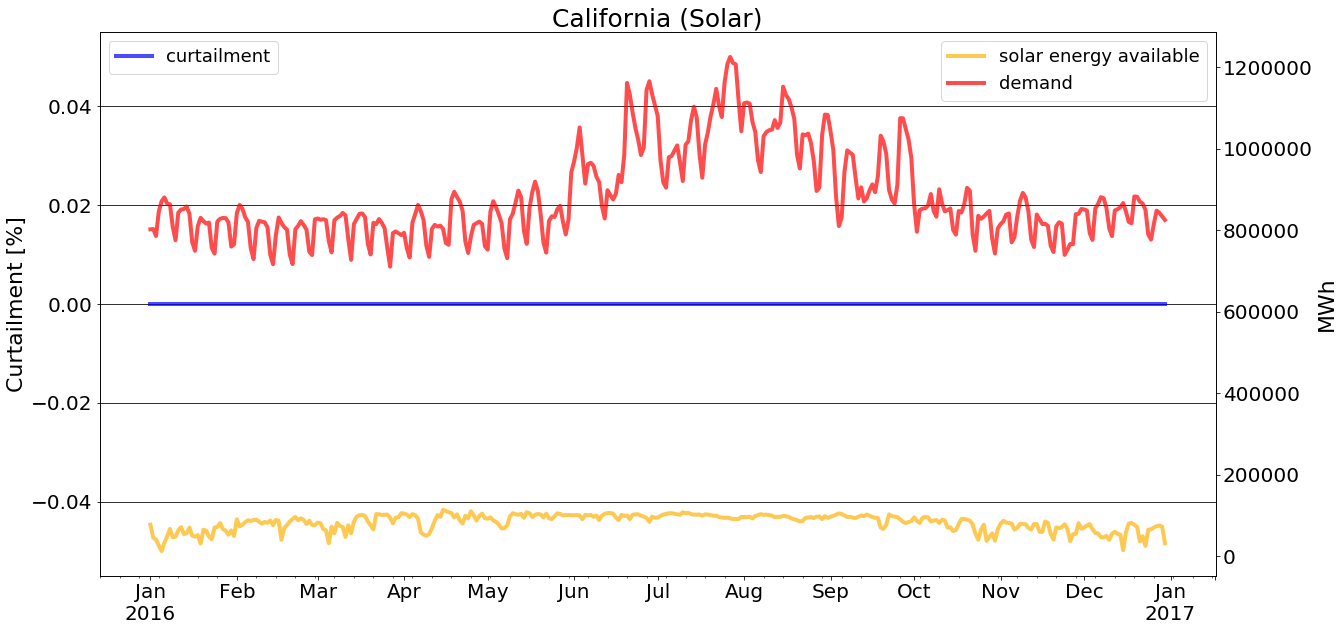

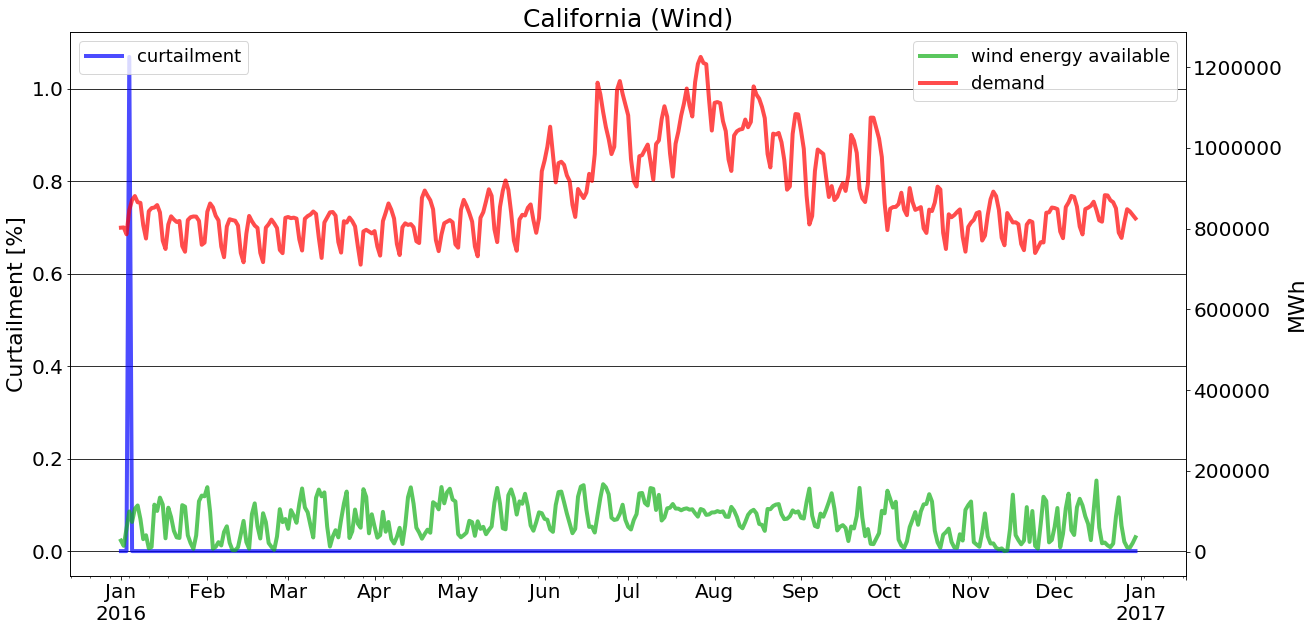

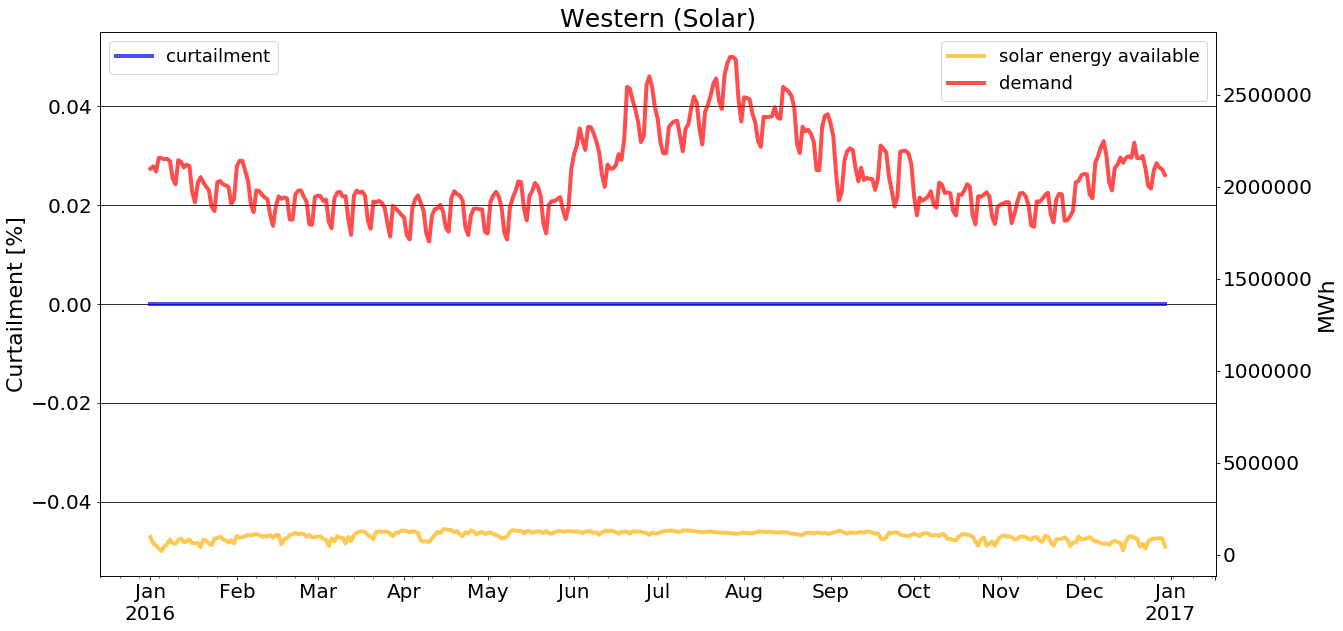

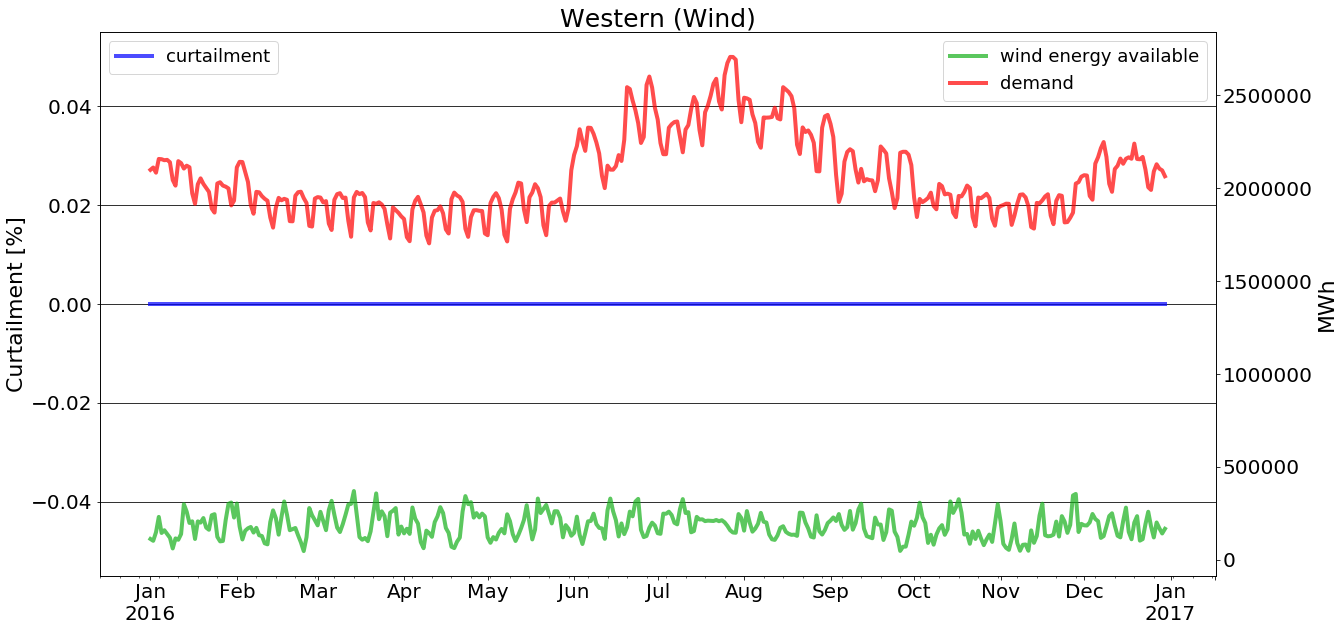

In [24]:
curtailment = apg((pg, win_data, multiplier),
                  ('2016-01-01-00', '2016-12-31-23', 'local', 'D'),
                  ['California', 'Western'],
                  ['solar', 'wind'],
                  'curtailment', normalize=False)
curtailment.get_plot(save=False)
data_curtailment = curtailment.get_data()

In [25]:
for zone in ['California', 'Western']:
    for resource in ['solar', 'wind']:
        available = data_curtailment[zone][resource].available.sum() 
        generated = data_curtailment[zone][resource].generated.sum()
        curtailment = 100 * (available - generated) / available
        print("Curtailment %s/%s: %.1f %%" % (zone, resource, curtailment))

Curtailment California/solar: 0.0 %
Curtailment California/wind: 0.0 %
Curtailment Western/solar: 0.0 %
Curtailment Western/wind: 0.1 %


## California 2030
<a id="ca2030"></a>
Multiperiod  
Solar power: SAM  
demand v3  
multiplier: 2.3 for solar and wind power output for whole western interconnect.

In [26]:
win_data.read_demand_data('cal2030')
win_data.read_solar_data('sam')
win_data.read_wind_data()

Load demand data
Load solar data
Load wind data


In [27]:
factor = [2.3, 2.3]
multiplier = pd.DataFrame({'multiplier': [1]*len(win_data.genbus)}, index=win_data.genbus.index.values)
for i, resource in enumerate(['solar', 'wind']):
    plant_id = get_plant_id('Western', resource)
    multiplier.loc[plant_id] = factor[i]

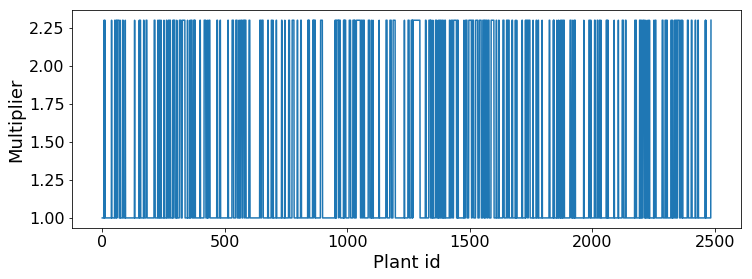

In [28]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(12,4))

ax = fig.gca()
multiplier.plot(ax=ax, legend=False)
ax.set_xlabel('Plant id', fontsize=18)
ax.set_ylabel('Multiplier', fontsize=18)
ax.tick_params(labelsize=16)
plt.show()

In [29]:
pg = od.get_data('california2030Test01', 'PG')

### 1. Charts
<a id="ca2030_chart"></a>

Set UTC for all zones


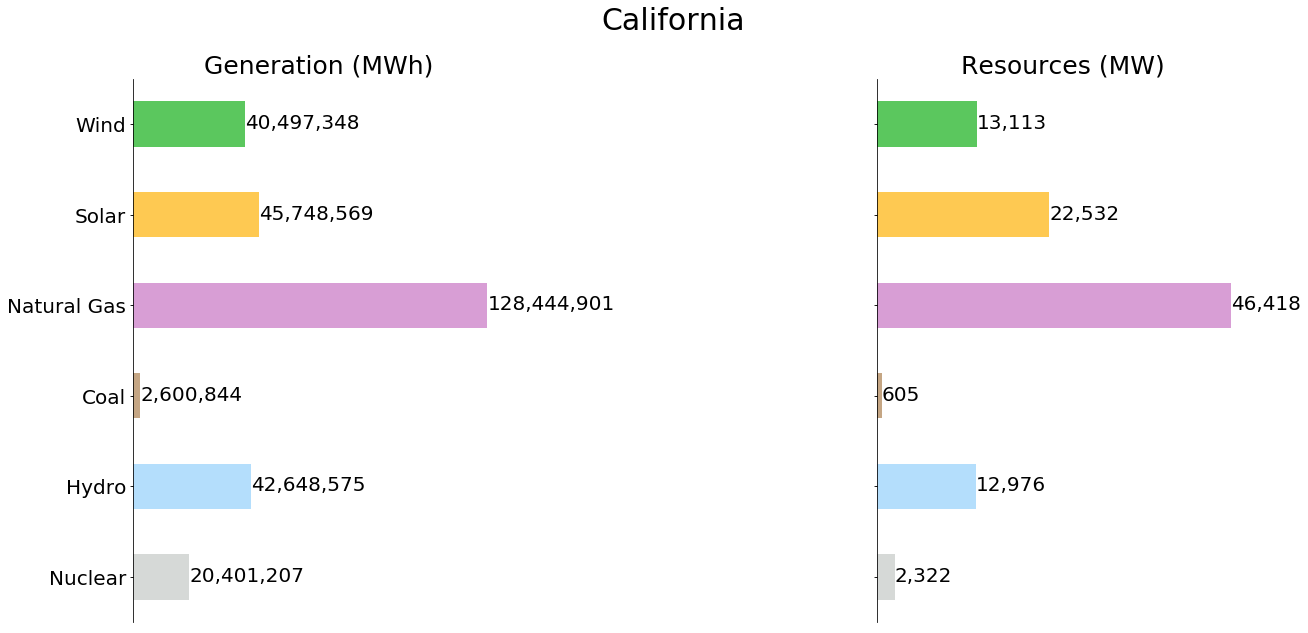

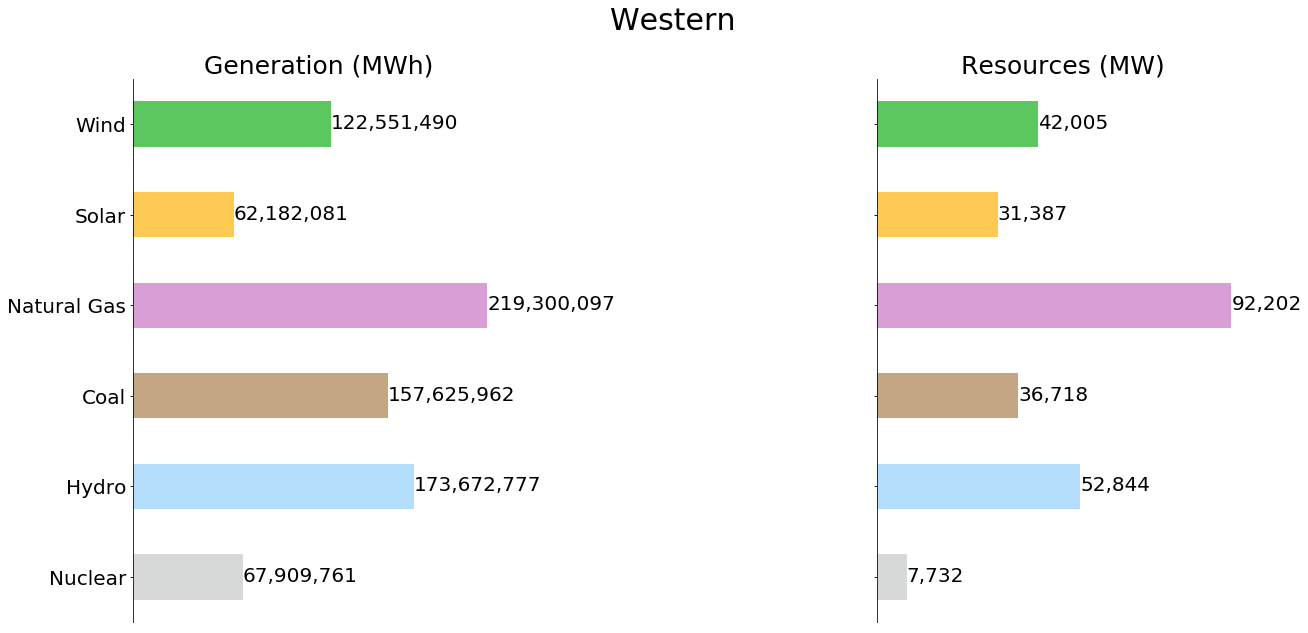

Total Generation in Western Interconnection: 803242171 MWh
Total Capacity in Western Interconnection: 262892 MW


In [30]:
chart = apg((pg, win_data, multiplier),
            ('2016-01-01-00', '2016-12-31-23', 'utc', 'H'),
            ['California', 'Western'],
            ['nuclear', 'hydro', 'coal', 'ng', 'solar', 'wind'],
            'chart', normalize=False)
chart.get_plot(save=False)
data_chart = chart.get_data()
print("Total Generation in Western Interconnection: %d MWh" % round(data_chart['Western']['Generation'].sum().sum()))
print("Total Capacity in Western Interconnection: %d MW" % round(data_chart['Western']['Capacity'].sum()))

### 2. Stacked Plots
<a id="ca2030_stack"></a>

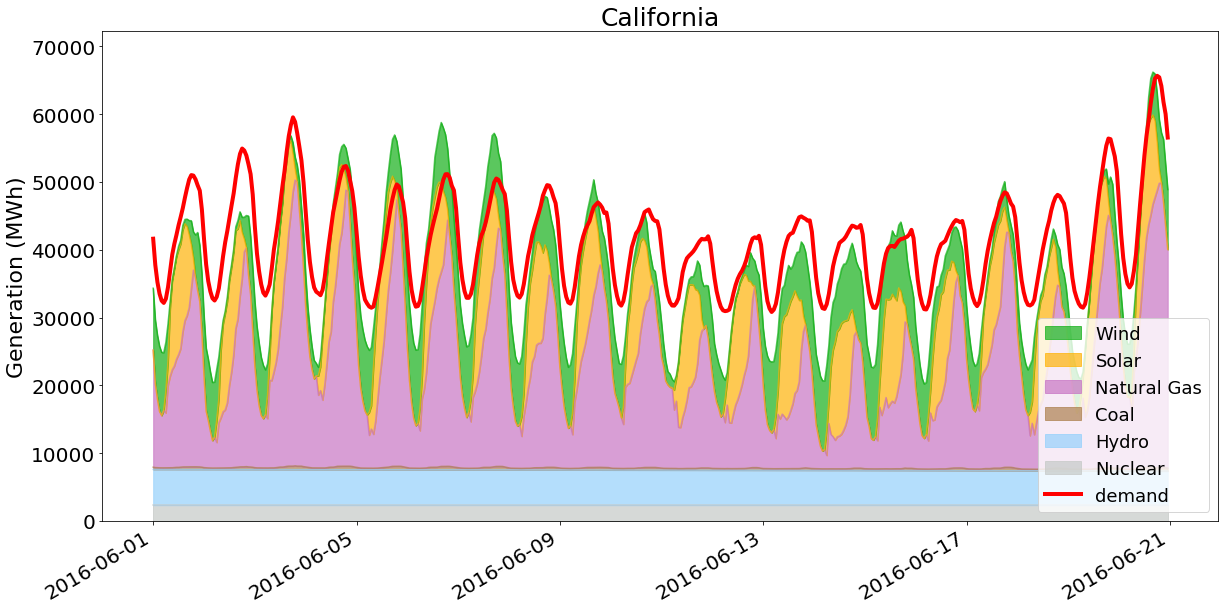

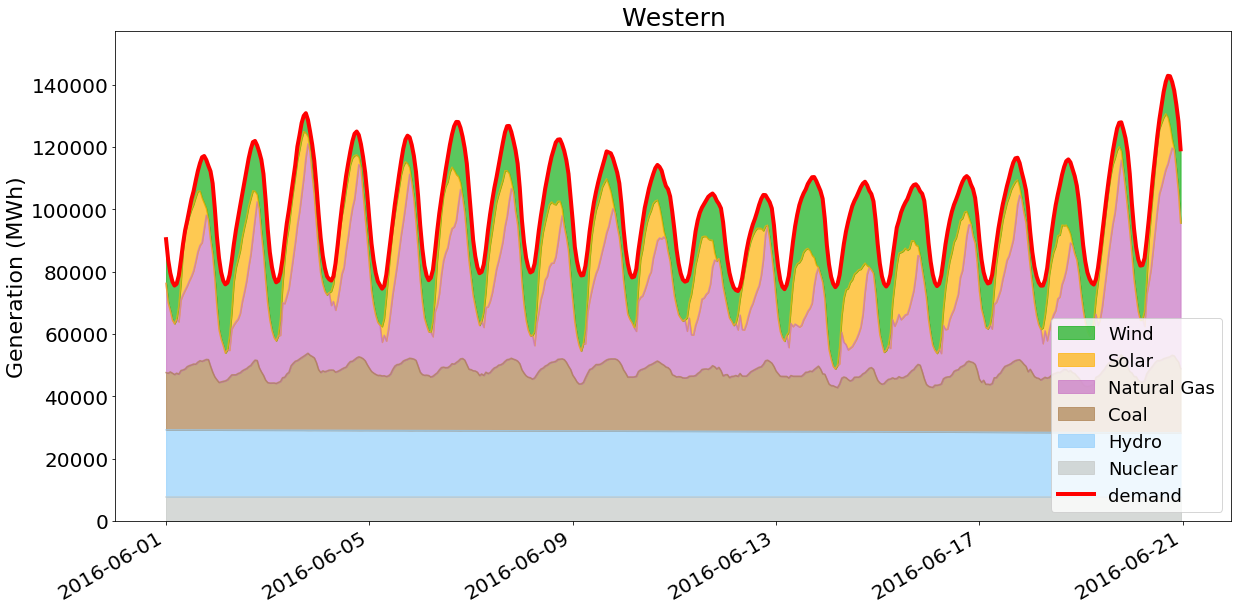

Generation in the Western interconnection in MWh:
95497191.70822236


In [31]:
stack = apg((pg, win_data, multiplier),
            ('2016-06-01-00', '2016-06-20-23', 'local', 'H'),
            ['California', 'Western'],
            ['nuclear', 'coal', 'ng', 'hydro', 'wind', 'solar'],
            'stacked', normalize=False)
stack.get_plot(save=False)
data_stack = stack.get_data()
print("Generation in the Western interconnection in MWh:")
print(data_stack['Western'].sum().sum())

### 3. Curtailment Plots
<a id="ca2030_curtailment"></a>

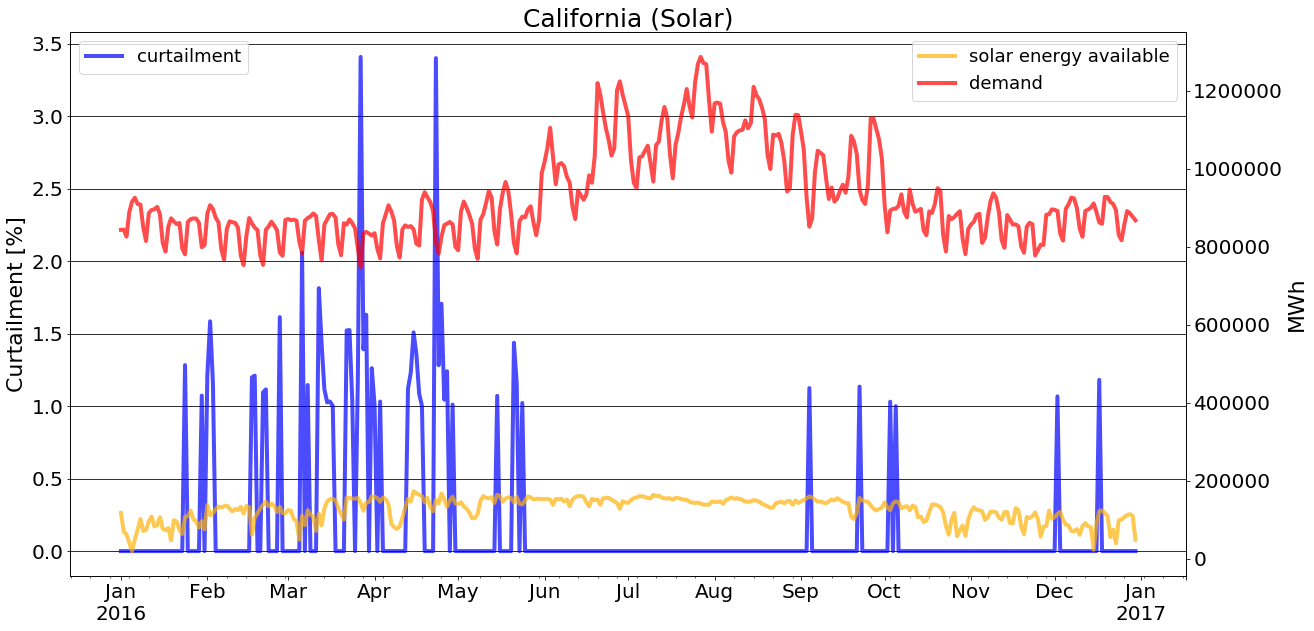

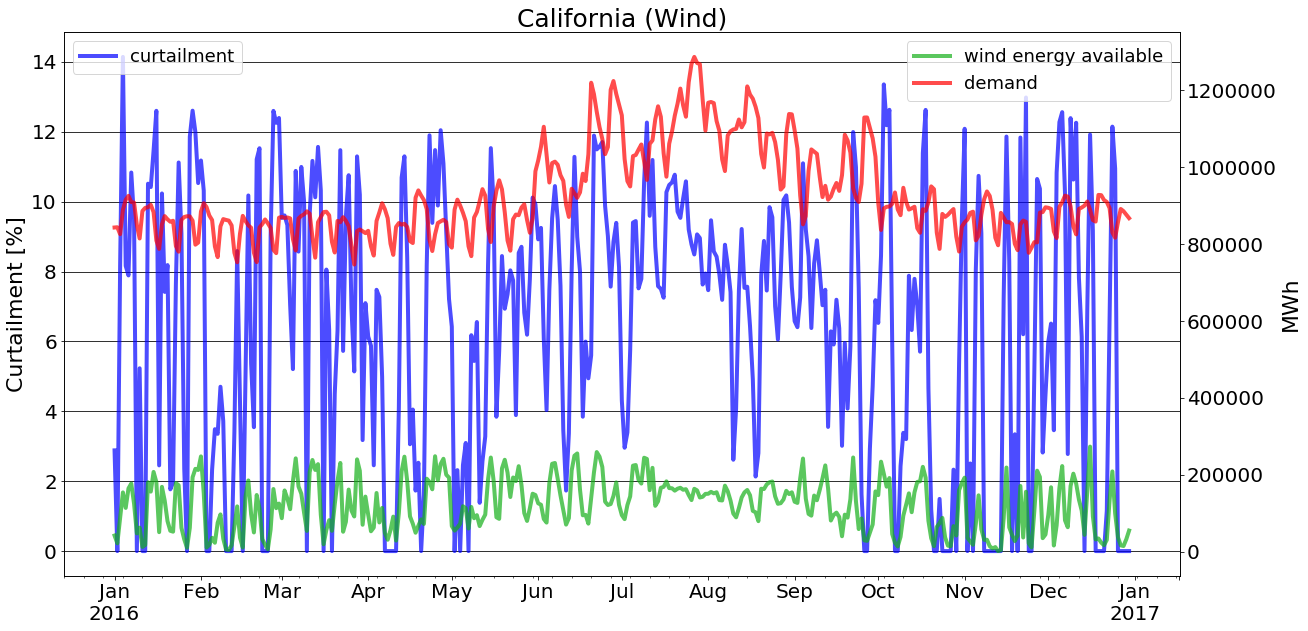

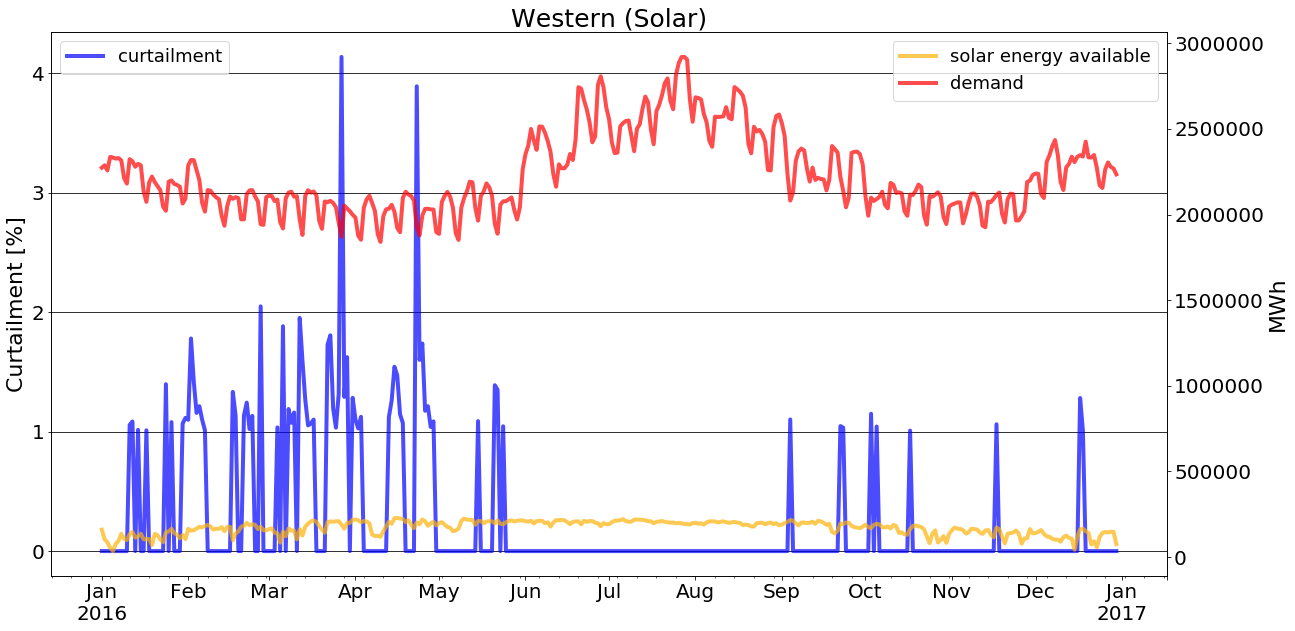

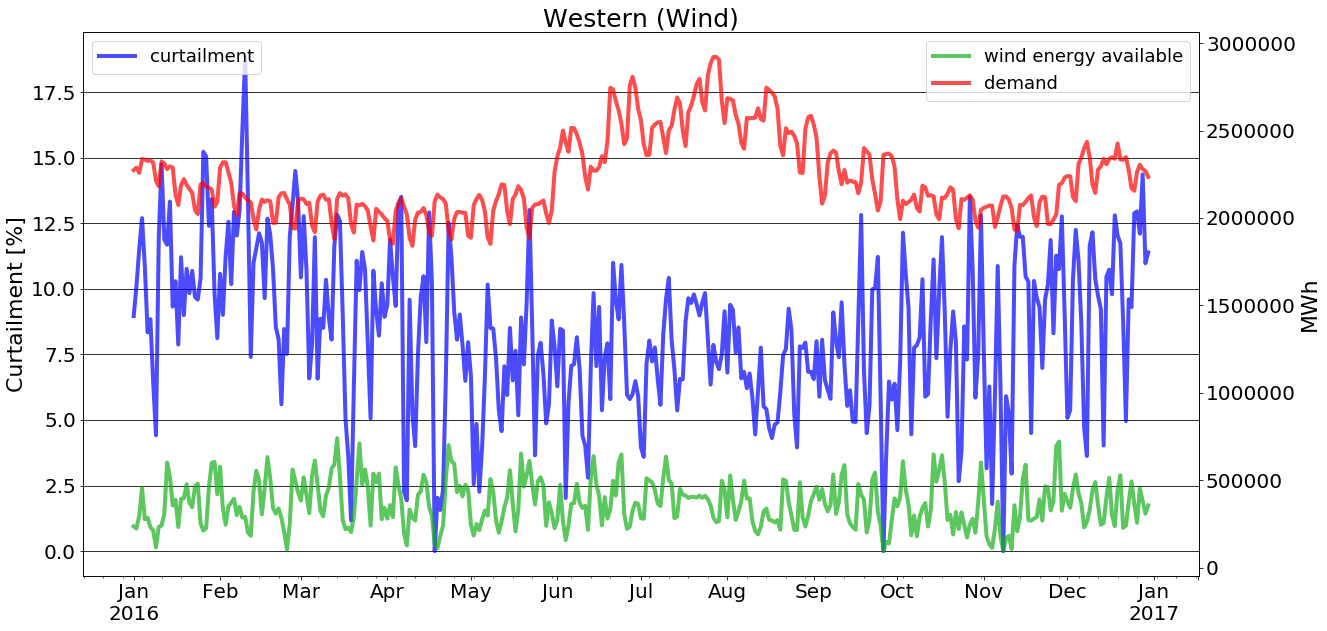

In [32]:
curtailment = apg((pg, win_data, multiplier),
                  ('2016-01-01-00', '2016-12-31-23', 'local', 'D'),
                  ['California', 'Western'],
                  ['solar', 'wind'],
                  'curtailment', normalize=False)
curtailment.get_plot(save=False)
data_curtailment = curtailment.get_data()

In [33]:
for zone in ['California', 'Western']:
    for resource in ['solar', 'wind']:
        available = data_curtailment[zone][resource].available.sum() 
        generated = data_curtailment[zone][resource].generated.sum()
        curtailment = 100 * (available - generated) / available
        print("Curtailment %s/%s: %.1f %%" % (zone, resource, curtailment))

Curtailment California/solar: 0.7 %
Curtailment California/wind: 8.3 %
Curtailment Western/solar: 0.8 %
Curtailment Western/wind: 8.9 %


## Congestion 2030
<a id="congestion2030"></a>
Multiperiod  
Solar power: SAM  
demand v3  
multiplier: 2.3 for solar and wind power output for whole western interconnect.  
Capacity of congested transmission lines in California: x2

In [34]:
win_data.read_demand_data('cal2030')
win_data.read_solar_data('sam')
win_data.read_wind_data()

Load demand data
Load solar data
Load wind data


In [35]:
factor = [2.3, 2.3]
multiplier = pd.DataFrame({'multiplier': [1]*len(win_data.genbus)}, index=win_data.genbus.index.values)
for i, resource in enumerate(['solar', 'wind']):
    plant_id = get_plant_id('Western', resource)
    multiplier.loc[plant_id] = factor[i]

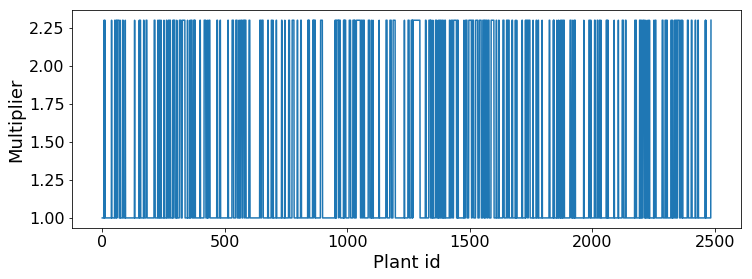

In [36]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(12,4))

ax = fig.gca()
multiplier.plot(ax=ax, legend=False)
ax.set_xlabel('Plant id', fontsize=18)
ax.set_ylabel('Multiplier', fontsize=18)
ax.tick_params(labelsize=16)
plt.show()

In [37]:
pg = od.get_data('california2030_fixCalCong', 'PG')

### 1. Charts
<a id="congestion2030_chart"></a>

Set UTC for all zones


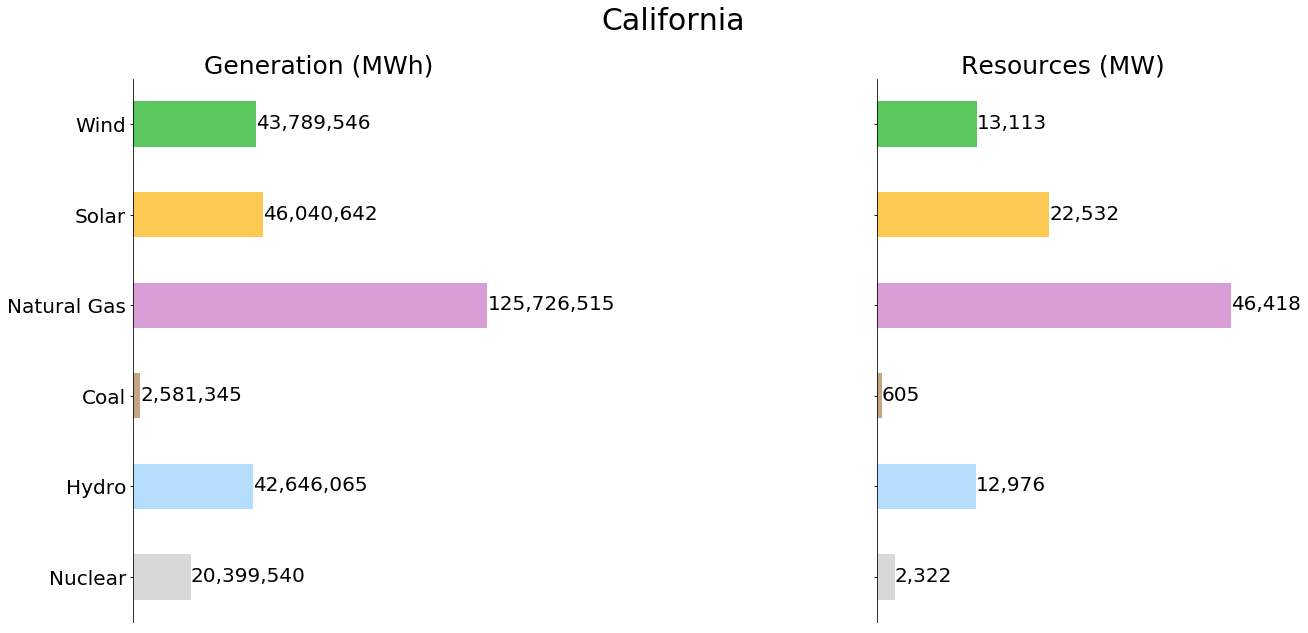

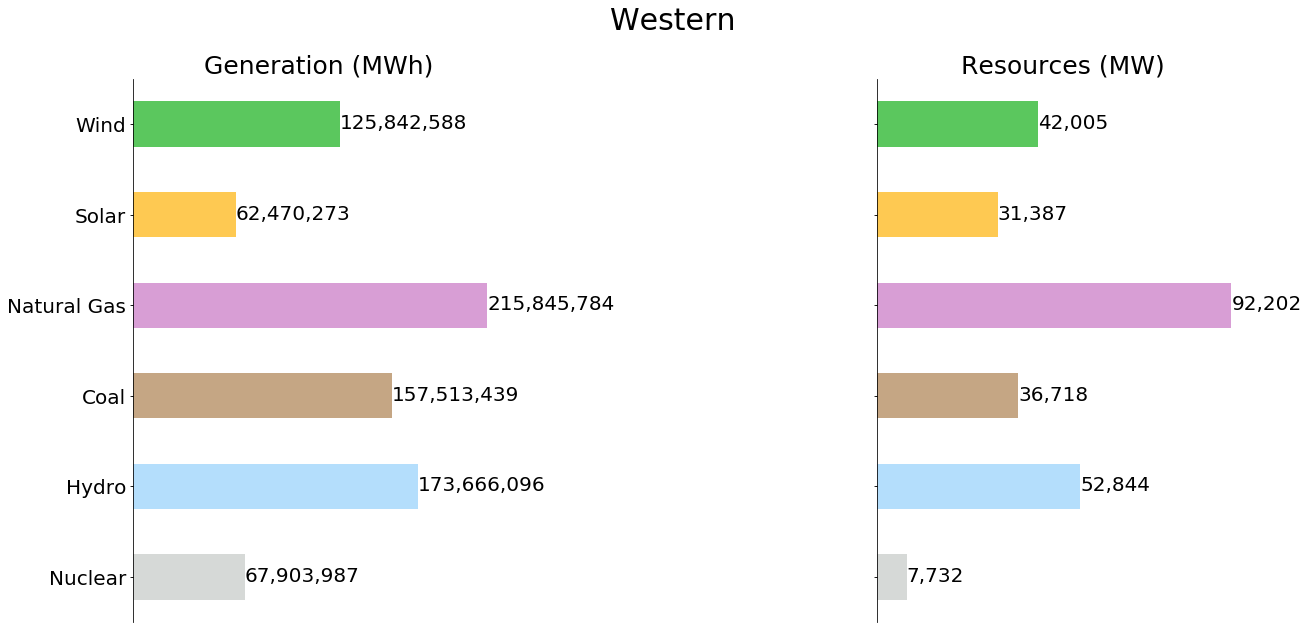

Total Generation in Western Interconnection: 803242171 MWh
Total Capacity in Western Interconnection: 262892 MW


In [38]:
chart = apg((pg, win_data, multiplier),
            ('2016-01-01-00', '2016-12-31-23', 'utc', 'H'),
            ['California', 'Western'],
            ['nuclear', 'hydro', 'coal', 'ng', 'solar', 'wind'],
            'chart', normalize=False)
chart.get_plot(save=False)
data_chart = chart.get_data()
print("Total Generation in Western Interconnection: %d MWh" % round(data_chart['Western']['Generation'].sum().sum()))
print("Total Capacity in Western Interconnection: %d MW" % round(data_chart['Western']['Capacity'].sum()))

### 2. Stacked Plots
<a id="congestion2030_stack"></a>

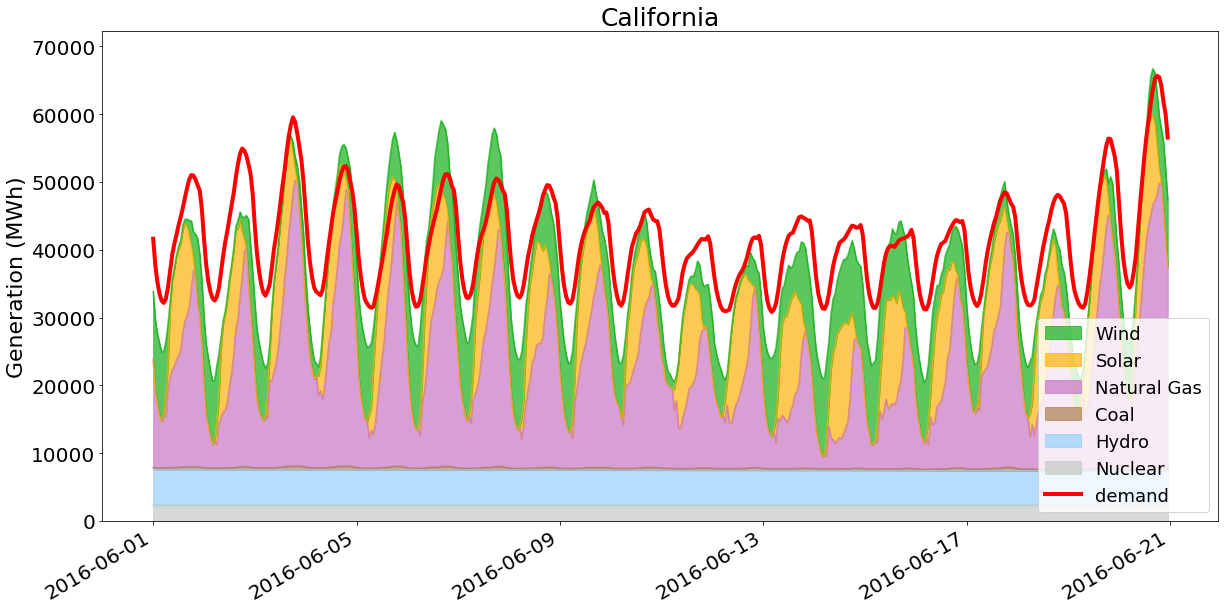

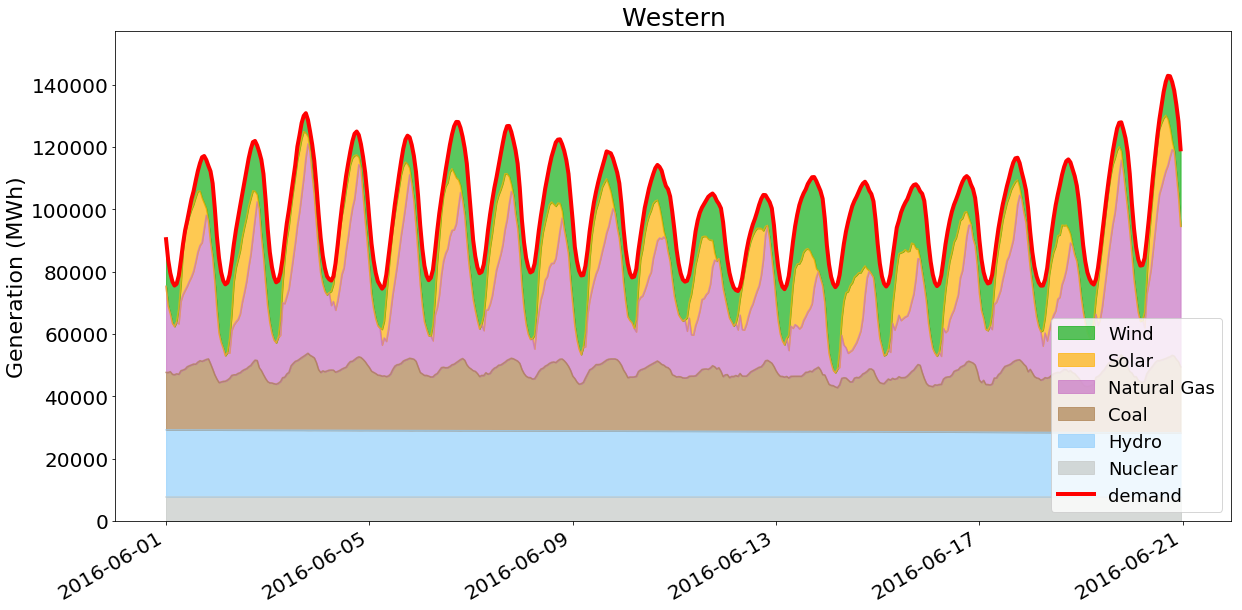

Generation in the Western interconnection in MWh:
95497191.7082454


In [39]:
stack = apg((pg, win_data, multiplier),
            ('2016-06-01-00', '2016-06-20-23', 'local', 'H'),
            ['California', 'Western'],
            ['nuclear', 'coal', 'ng', 'hydro', 'wind', 'solar'],
            'stacked', normalize=False)
stack.get_plot(save=False)
data_stack = stack.get_data()
print("Generation in the Western interconnection in MWh:")
print(data_stack['Western'].sum().sum())

### 3. Curtailment Plots
<a id="congestion2030_curtailment"></a>

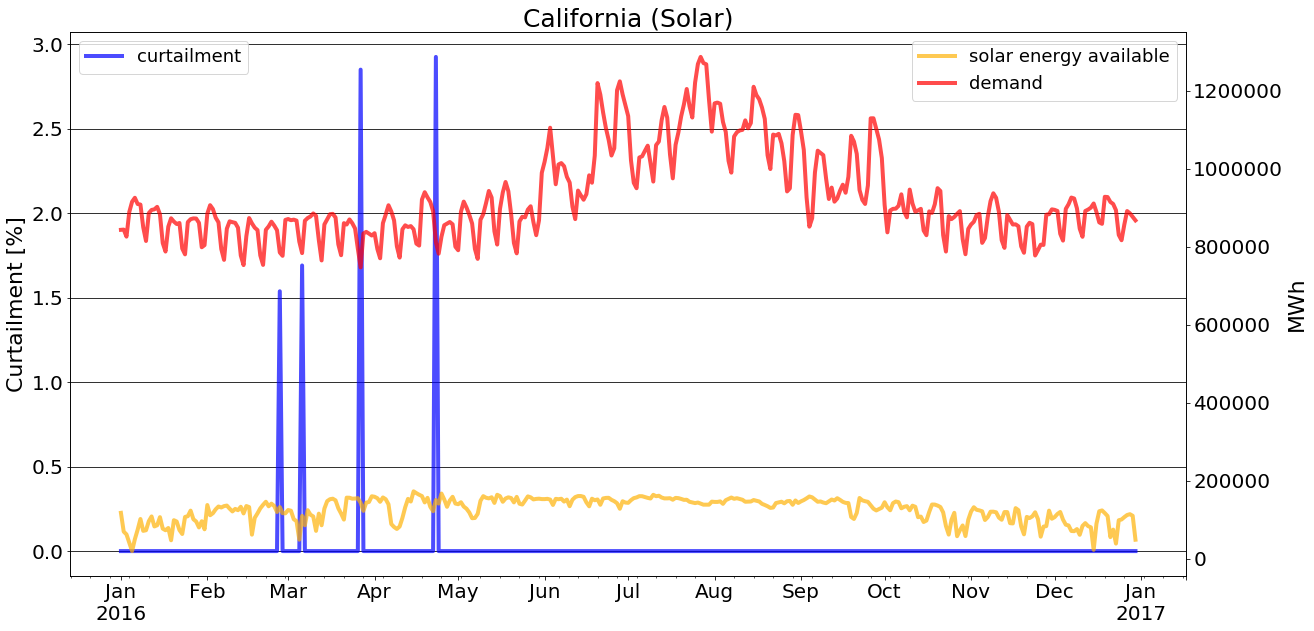

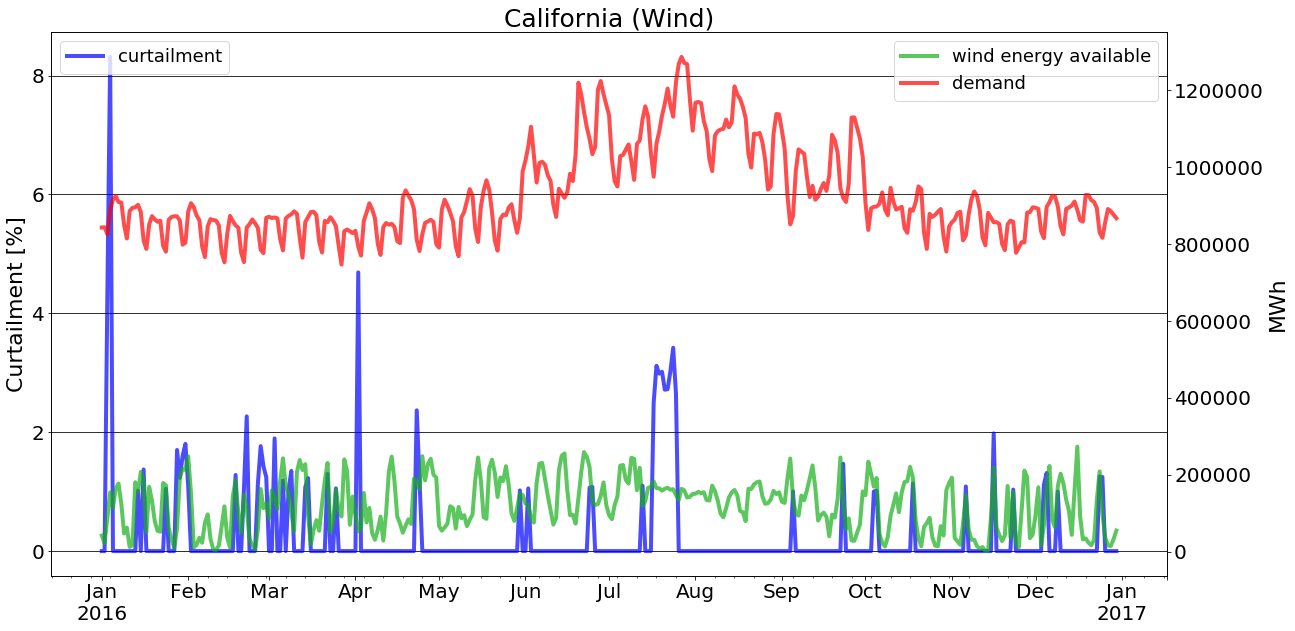

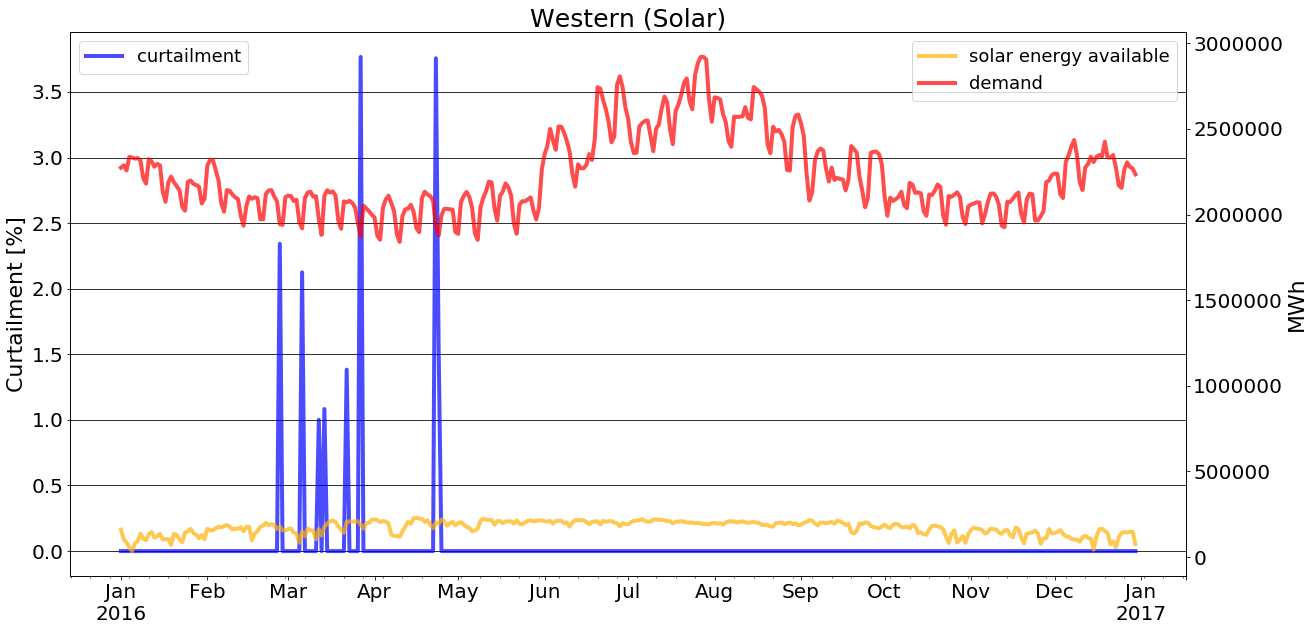

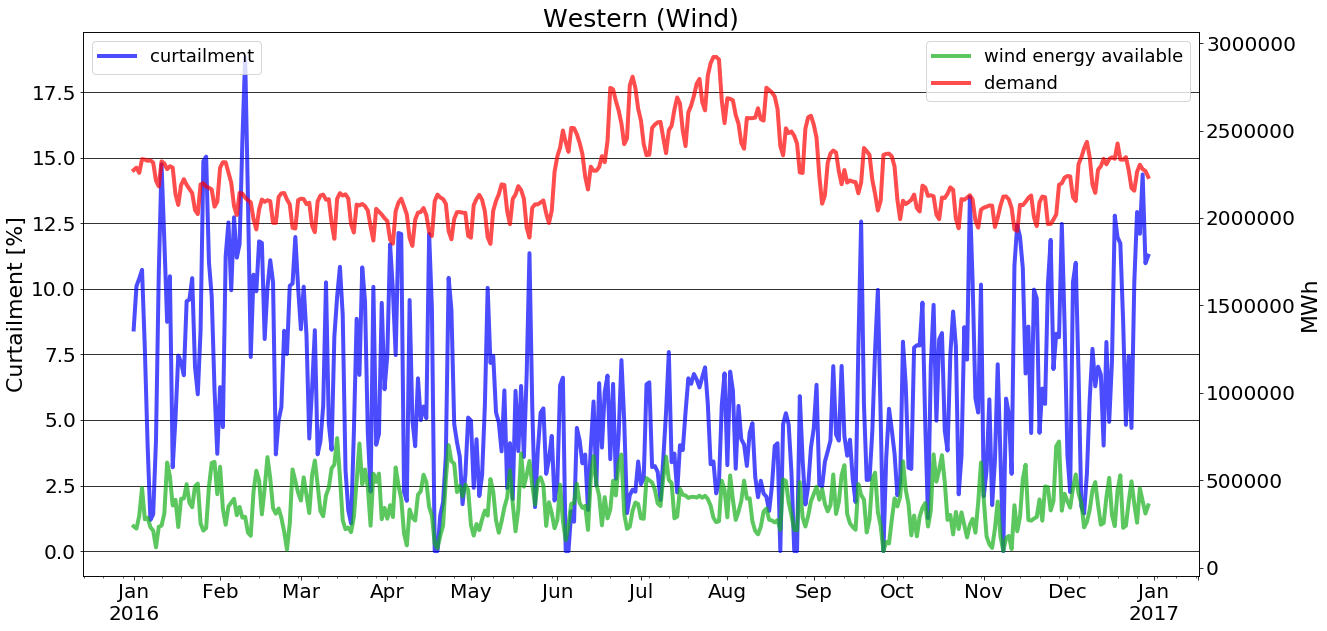

In [40]:
curtailment = apg((pg, win_data, multiplier),
                  ('2016-01-01-00', '2016-12-31-23', 'local', 'D'),
                  ['California', 'Western'],
                  ['solar', 'wind'],
                  'curtailment', normalize=False)
curtailment.get_plot(save=False)
data_curtailment = curtailment.get_data()

In [41]:
for zone in ['California', 'Western']:
    for resource in ['solar', 'wind']:
        available = data_curtailment[zone][resource].available.sum() 
        generated = data_curtailment[zone][resource].generated.sum()
        curtailment = 100 * (available - generated) / available
        print("Curtailment %s/%s: %.1f %%" % (zone, resource, curtailment))

Curtailment California/solar: 0.1 %
Curtailment California/wind: 0.8 %
Curtailment Western/solar: 0.3 %
Curtailment Western/wind: 6.4 %


## West 2020
<a id="west2020"></a>
Multiperiod  
Solar power: SAM  
demand v3  
multiplier: 2.25 for solar and wind power output for whole western interconnect.

In [42]:
win_data.read_demand_data('cal2020')
win_data.read_solar_data('sam')
win_data.read_wind_data()

Load demand data
Load solar data
Load wind data


In [43]:
factor = [2.25, 2.25]
multiplier = pd.DataFrame({'multiplier': [1]*len(win_data.genbus)}, index=win_data.genbus.index.values)
for i, resource in enumerate(['solar', 'wind']):
    plant_id = get_plant_id('Western', resource)
    multiplier.loc[plant_id] = factor[i]

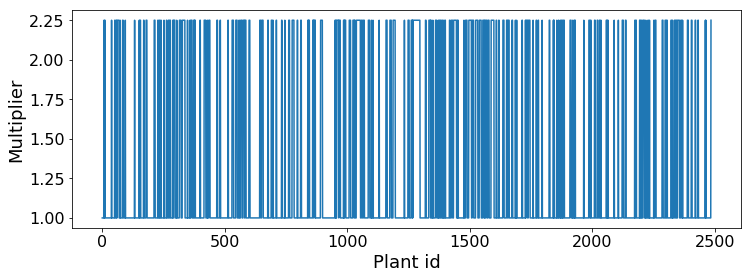

In [44]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(12,4))

ax = fig.gca()
multiplier.plot(ax=ax, legend=False)
ax.set_xlabel('Plant id', fontsize=18)
ax.set_ylabel('Multiplier', fontsize=18)
ax.tick_params(labelsize=16)
plt.show()

In [45]:
pg = od.get_data('california2020_westTarget', 'PG')

### 1. Charts
<a id="west2020_chart"></a>

Set UTC for all zones


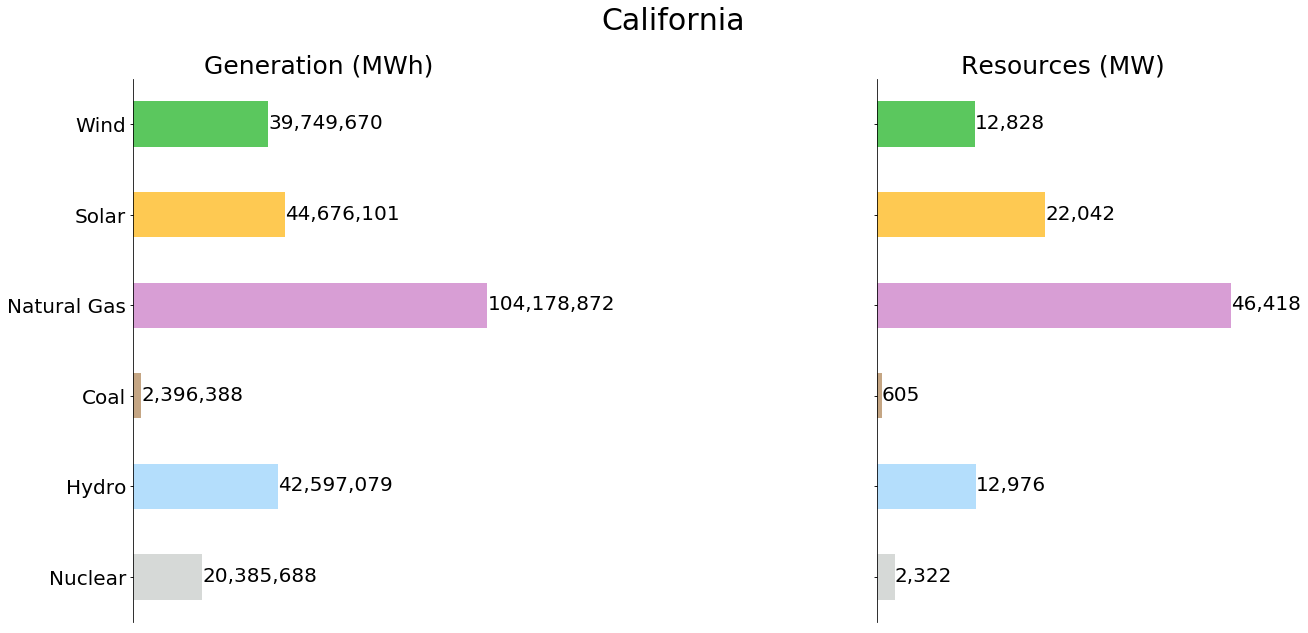

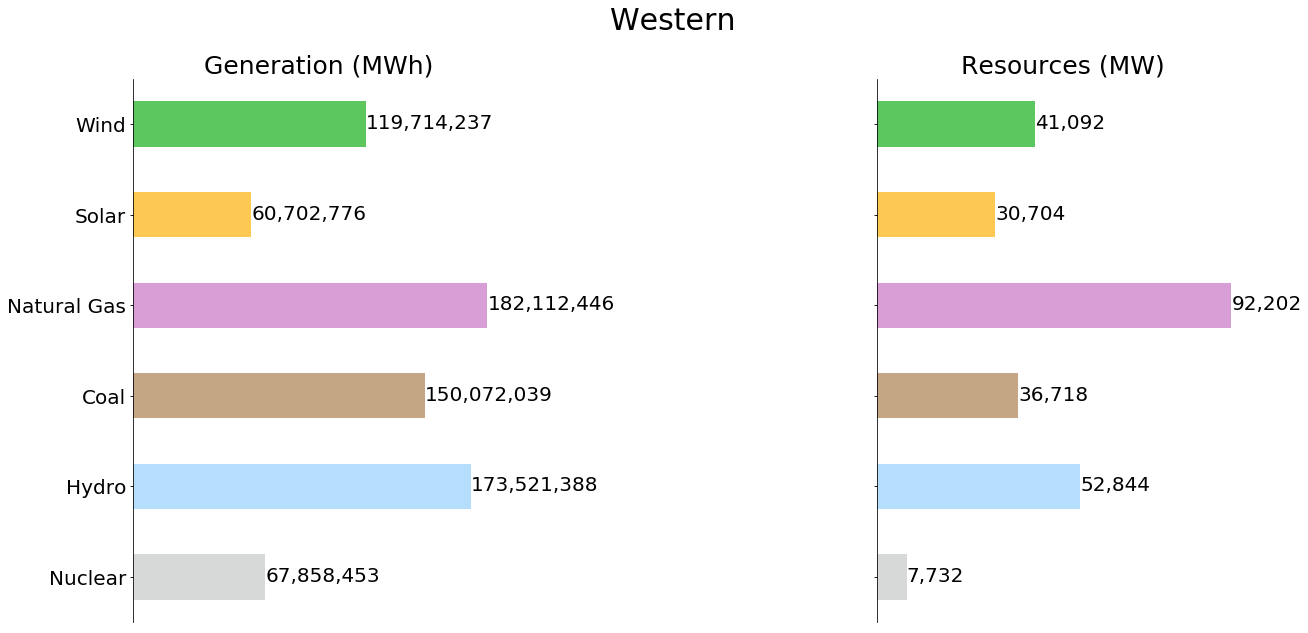

Total Generation in Western Interconnection: 753981342 MWh
Total Capacity in Western Interconnection: 261297 MW


In [46]:
chart = apg((pg, win_data, multiplier),
            ('2016-01-01-00', '2016-12-31-23', 'utc', 'H'),
            ['California', 'Western'],
            ['nuclear', 'hydro', 'coal', 'ng', 'solar', 'wind'],
            'chart', normalize=False)
chart.get_plot(save=False)
data_chart = chart.get_data()
print("Total Generation in Western Interconnection: %d MWh" % round(data_chart['Western']['Generation'].sum().sum()))
print("Total Capacity in Western Interconnection: %d MW" % round(data_chart['Western']['Capacity'].sum()))

### 2. Stacked Plots
<a id="west2020_stack"></a>

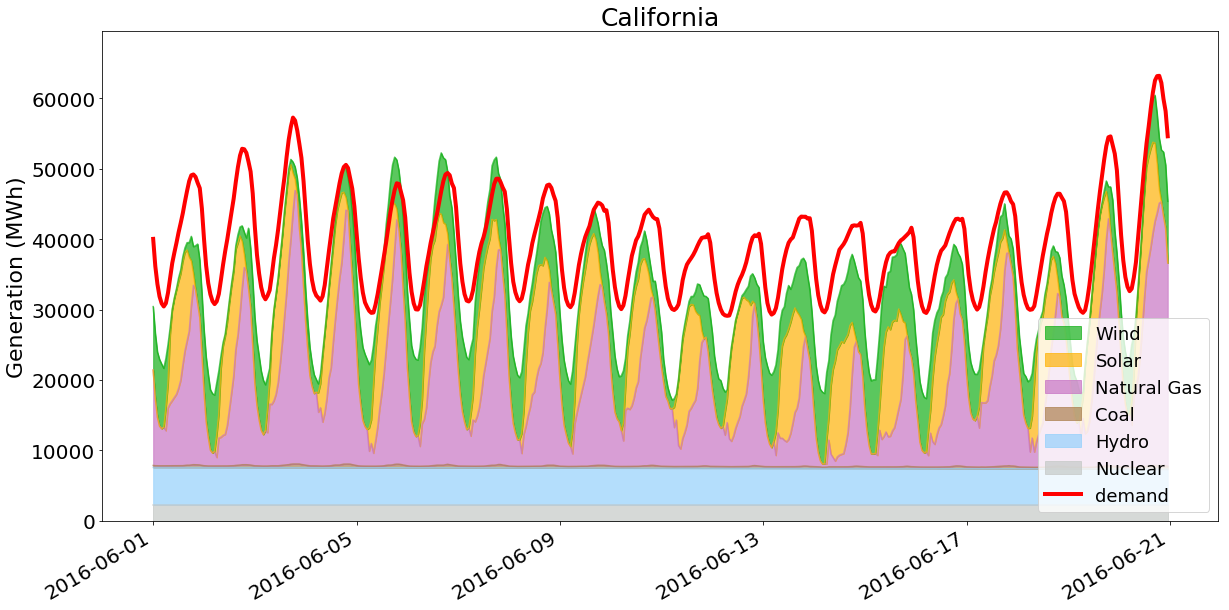

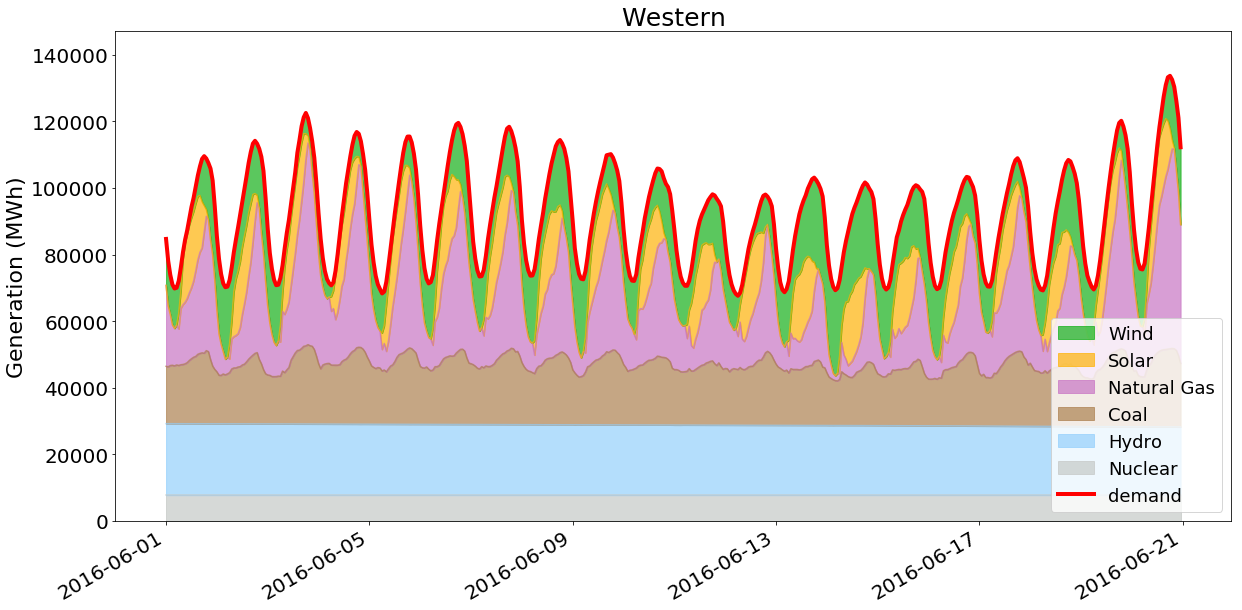

Generation in the Western interconnection in MWh:
88388034.35132152


In [47]:
stack = apg((pg, win_data, multiplier),
            ('2016-06-01-00', '2016-06-20-23', 'local', 'H'),
            ['California', 'Western'],
            ['nuclear', 'coal', 'ng', 'hydro', 'wind', 'solar'],
            'stacked', normalize=False)
stack.get_plot(save=False)
data_stack = stack.get_data()
print("Generation in the Western interconnection in MWh:")
print(data_stack['Western'].sum().sum())

### 3. Curtailment Plots
<a id="west2020_curtailment"></a>

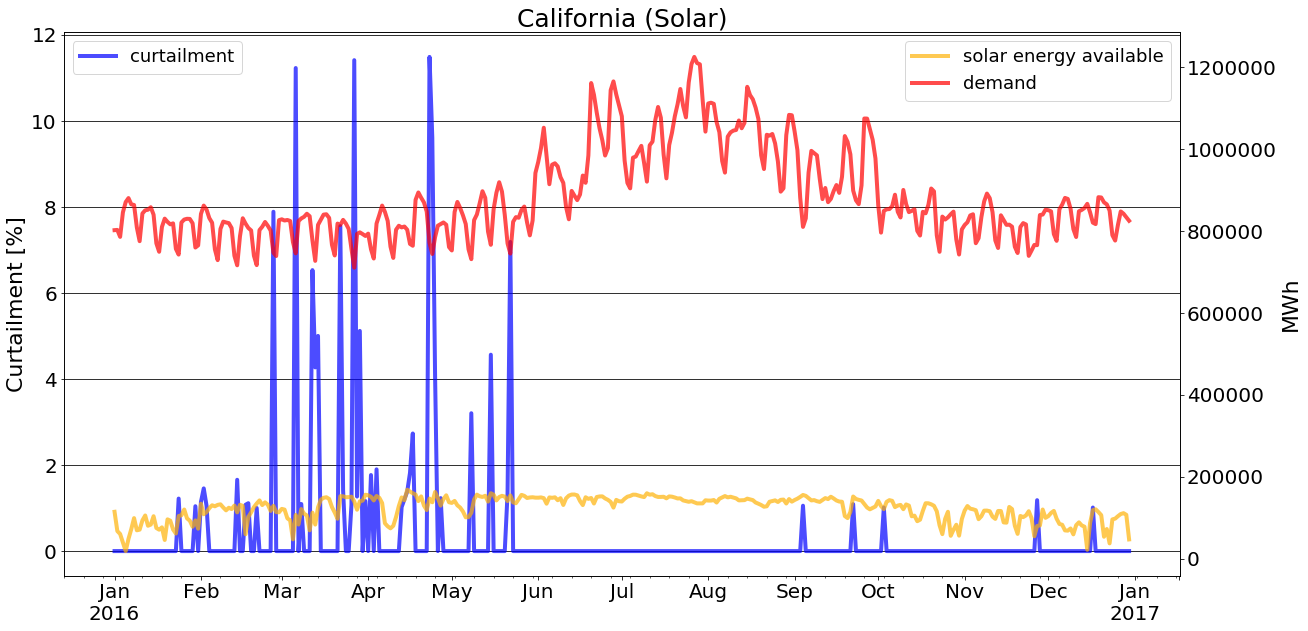

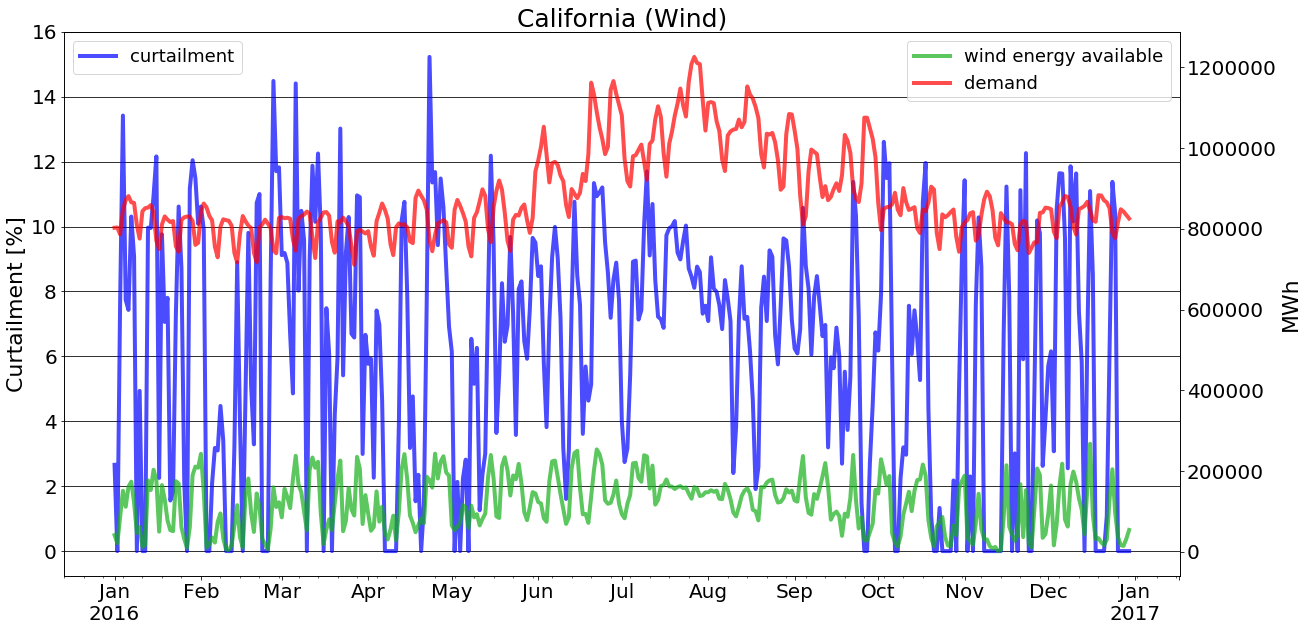

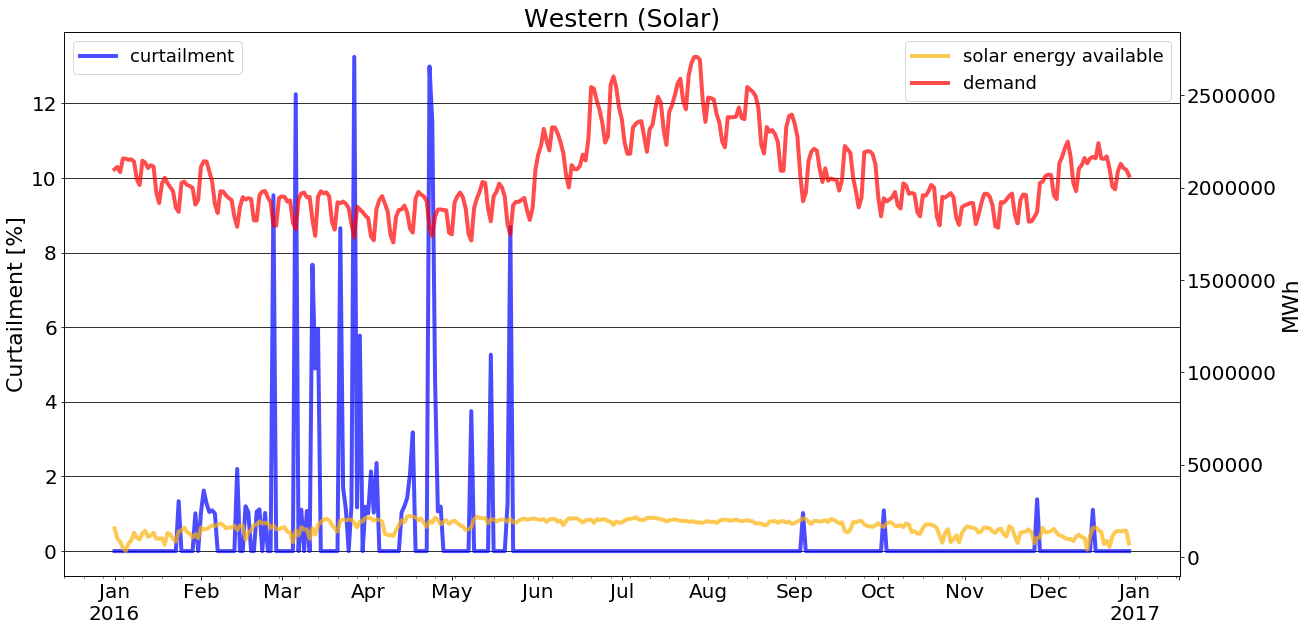

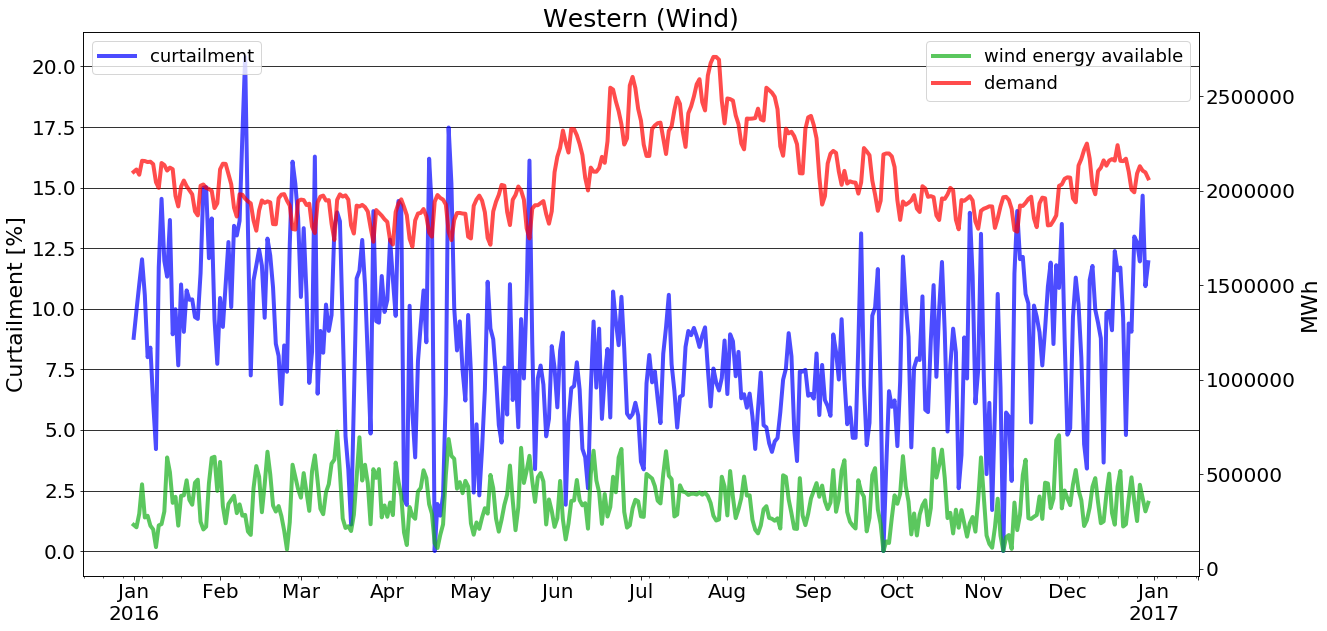

In [48]:
curtailment = apg((pg, win_data, multiplier),
                  ('2016-01-01-00', '2016-12-31-23', 'local', 'D'),
                  ['California', 'Western'],
                  ['solar', 'wind'],
                  'curtailment', normalize=False)
curtailment.get_plot(save=False)
data_curtailment = curtailment.get_data()

In [49]:
for zone in ['California', 'Western']:
    for resource in ['solar', 'wind']:
        available = data_curtailment[zone][resource].available.sum() 
        generated = data_curtailment[zone][resource].generated.sum()
        curtailment = 100 * (available - generated) / available
        print("Curtailment %s/%s: %.1f %%" % (zone, resource, curtailment))

Curtailment California/solar: 0.9 %
Curtailment California/wind: 7.9 %
Curtailment Western/solar: 1.0 %
Curtailment Western/wind: 9.0 %


## West 2030
<a id="west2030"></a>
Multiperiod  
Solar power: SAM  
demand v3  
multiplier: 5 for solar and wind power output for whole western interconnect.

In [50]:
win_data.read_demand_data('cal2030')
win_data.read_solar_data('sam')
win_data.read_wind_data()

Load demand data
Load solar data
Load wind data


In [51]:
factor = [5, 5]
multiplier = pd.DataFrame({'multiplier': [1]*len(win_data.genbus)}, index=win_data.genbus.index.values)
for i, resource in enumerate(['solar', 'wind']):
    plant_id = get_plant_id('Western', resource)
    multiplier.loc[plant_id] = factor[i]

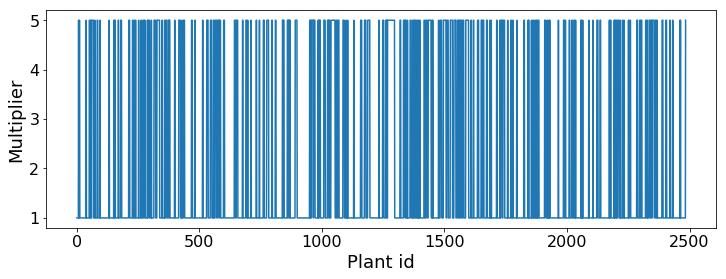

In [52]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(12,4))

ax = fig.gca()
multiplier.plot(ax=ax, legend=False)
ax.set_xlabel('Plant id', fontsize=18)
ax.set_ylabel('Multiplier', fontsize=18)
ax.tick_params(labelsize=16)
plt.show()

In [53]:
pg = od.get_data('california2030_westTarget', 'PG')

### 1. Charts
<a id="west2030_chart"></a>

Set UTC for all zones


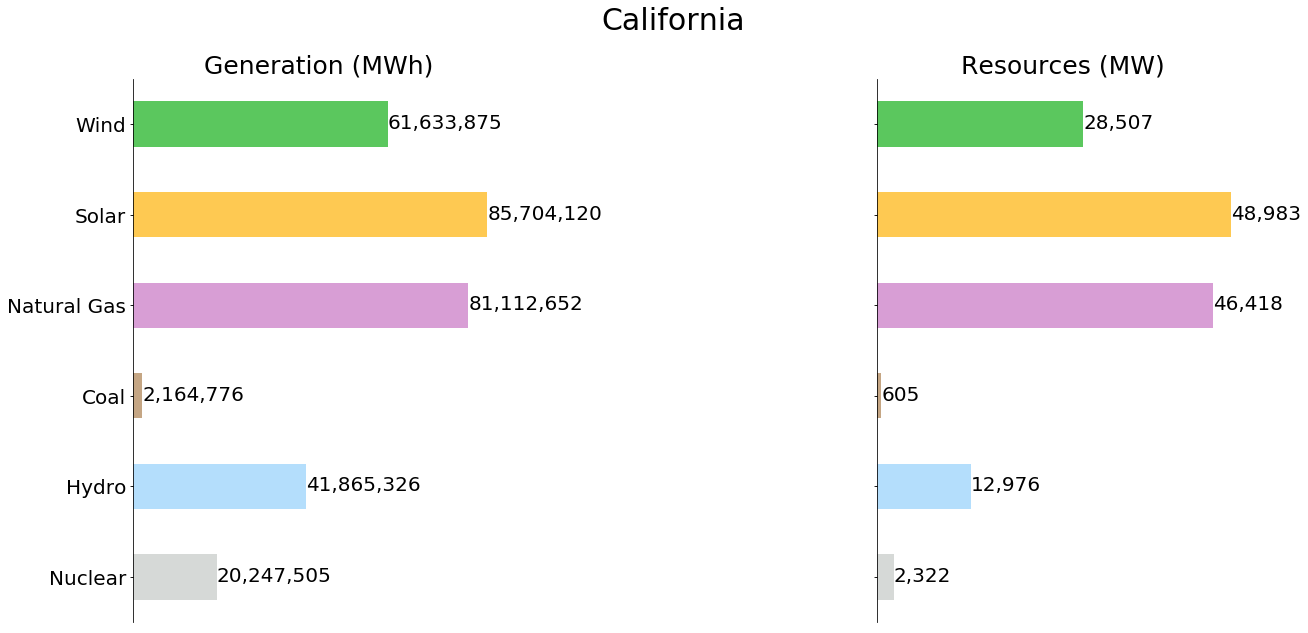

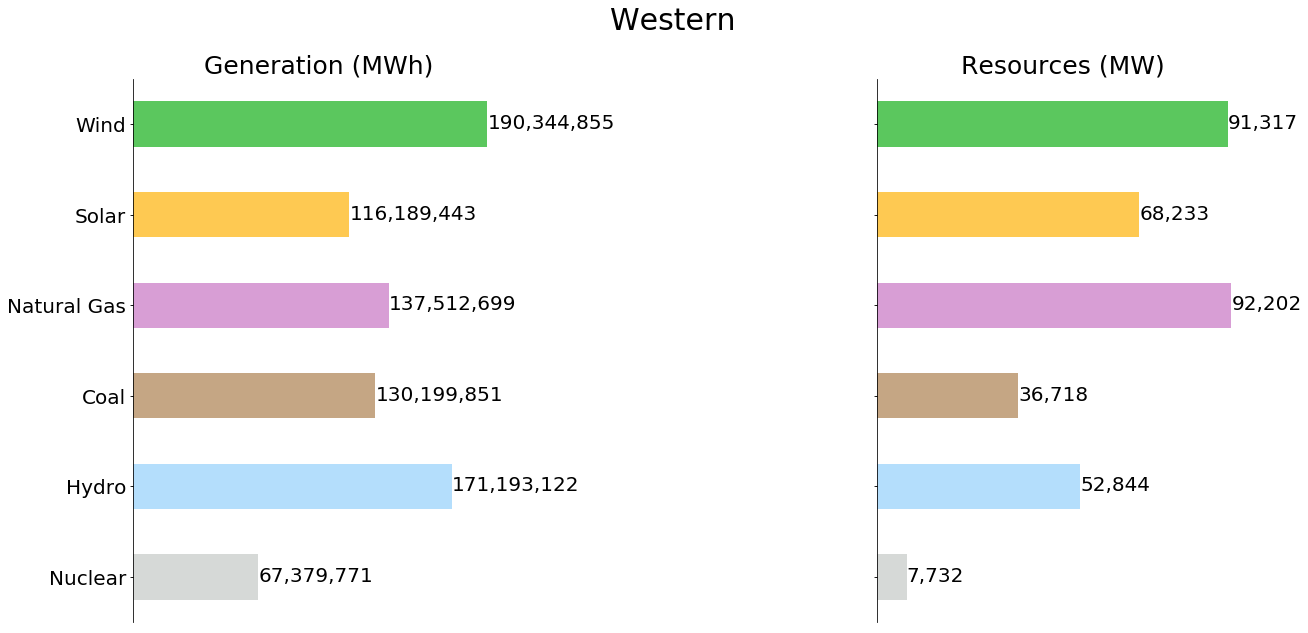

Total Generation in Western Interconnection: 812819743 MWh
Total Capacity in Western Interconnection: 349049 MW


In [54]:
chart = apg((pg, win_data, multiplier),
            ('2016-01-01-00', '2016-12-31-23', 'utc', 'H'),
            ['California', 'Western'],
            ['nuclear', 'hydro', 'coal', 'ng', 'solar', 'wind'],
            'chart', normalize=False)
chart.get_plot(save=False)
data_chart = chart.get_data()
print("Total Generation in Western Interconnection: %d MWh" % round(data_chart['Western']['Generation'].sum().sum()))
print("Total Capacity in Western Interconnection: %d MW" % round(data_chart['Western']['Capacity'].sum()))

### 2. Stacked Plots
<a id="west2030_stack"></a>

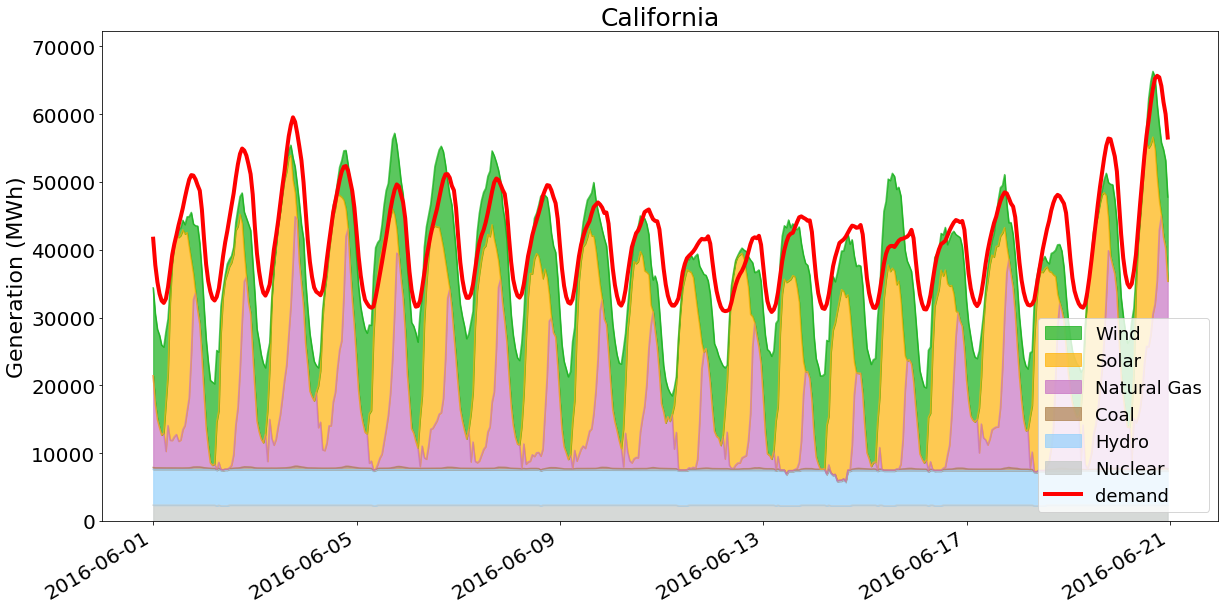

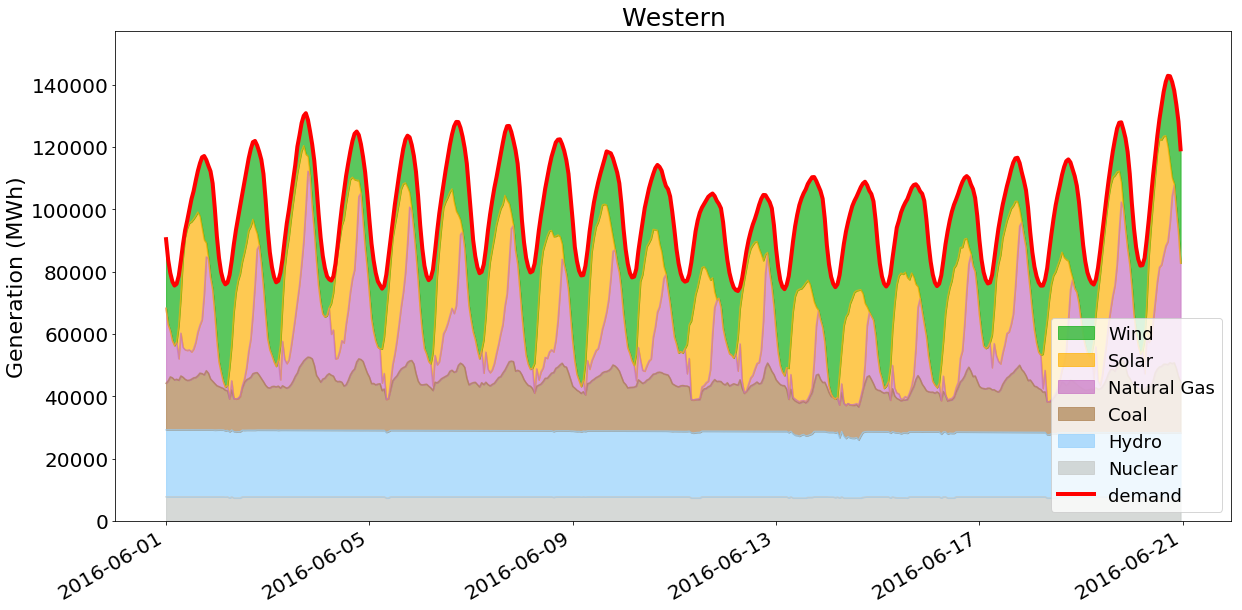

Generation in the Western interconnection in MWh:
95497191.71122605


In [55]:
stack = apg((pg, win_data, multiplier),
            ('2016-06-01-00', '2016-06-20-23', 'local', 'H'),
            ['California', 'Western'],
            ['nuclear', 'coal', 'ng', 'hydro', 'wind', 'solar'],
            'stacked', normalize=False)
stack.get_plot(save=False)
data_stack = stack.get_data()
print("Generation in the Western interconnection in MWh:")
print(data_stack['Western'].sum().sum())

### 3. Curtailment Plots
<a id="west2030_curtailment"></a>

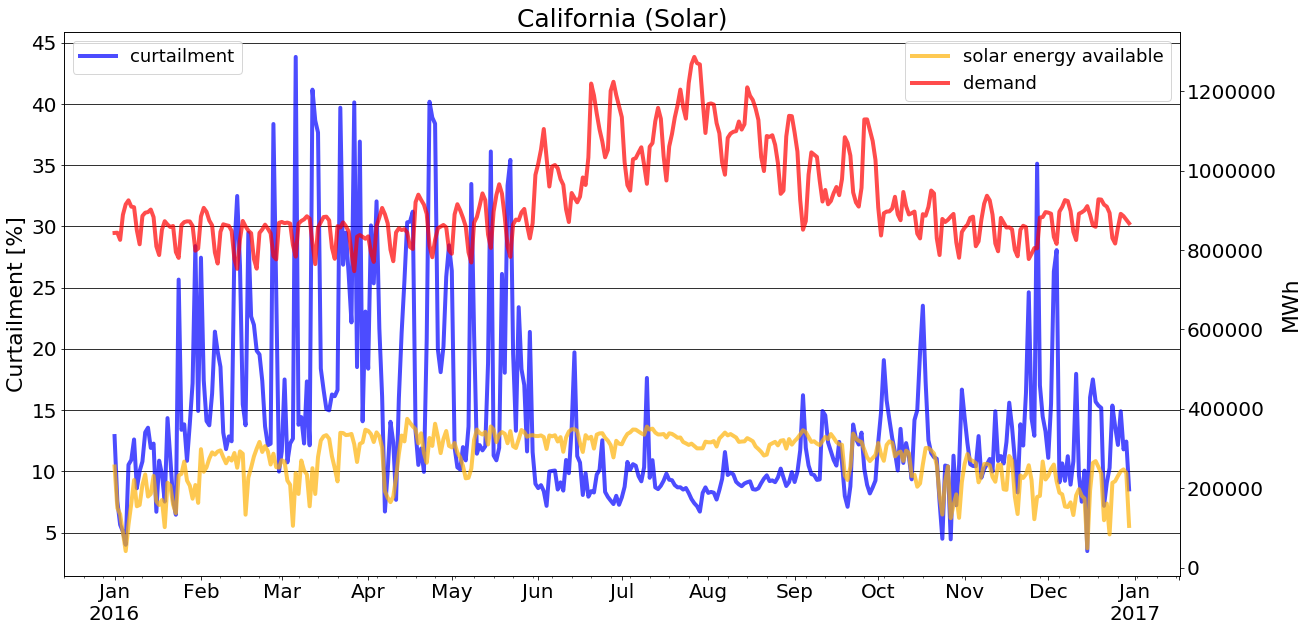

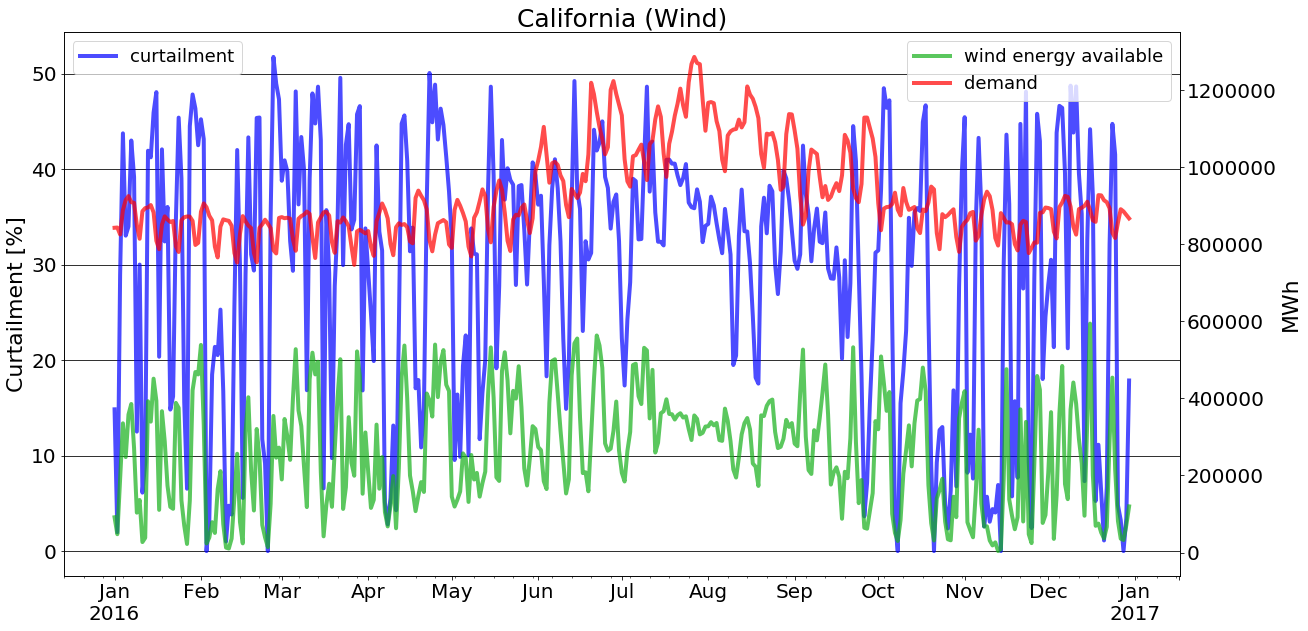

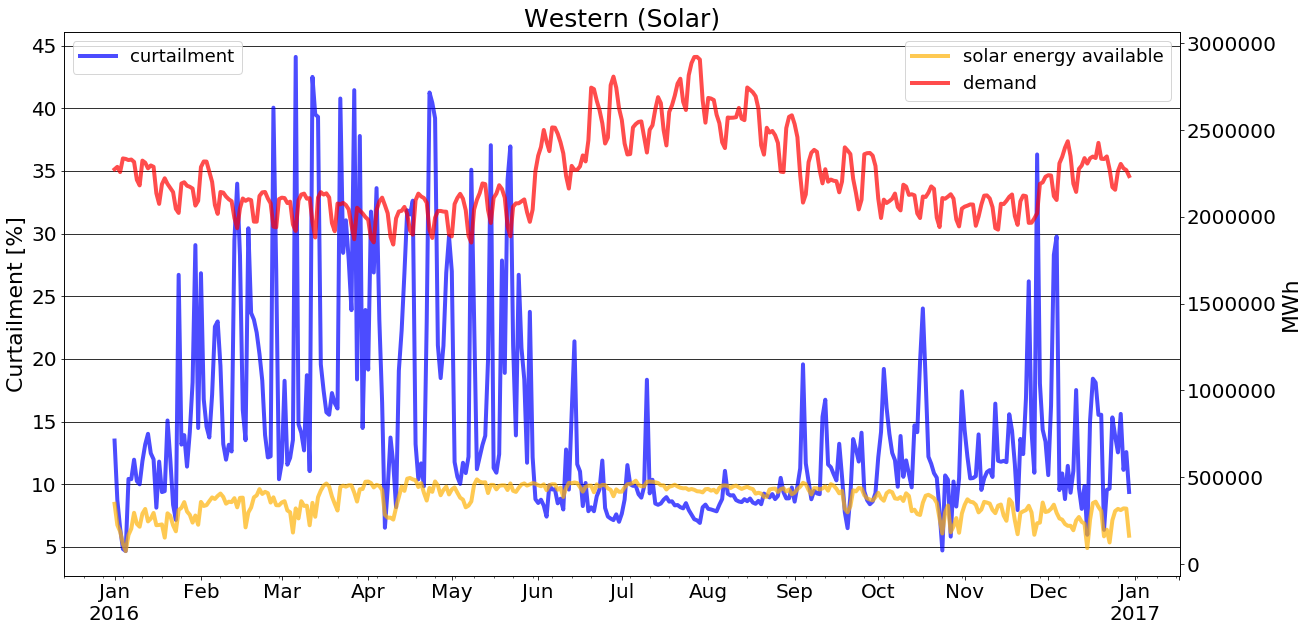

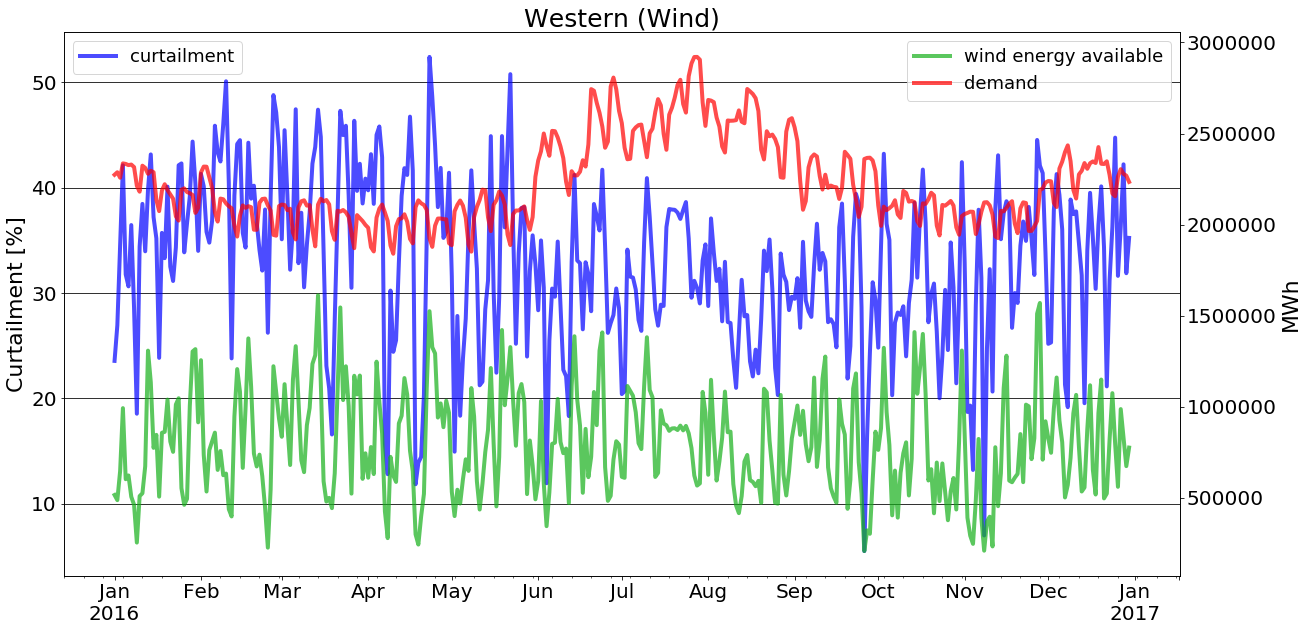

In [56]:
curtailment = apg((pg, win_data, multiplier),
                  ('2016-01-01-00', '2016-12-31-23', 'local', 'D'),
                  ['California', 'Western'],
                  ['solar', 'wind'],
                  'curtailment', normalize=False)
curtailment.get_plot(save=False)
data_curtailment = curtailment.get_data()

In [57]:
for zone in ['California', 'Western']:
    for resource in ['solar', 'wind']:
        available = data_curtailment[zone][resource].available.sum() 
        generated = data_curtailment[zone][resource].generated.sum()
        curtailment = 100 * (available - generated) / available
        print("Curtailment %s/%s: %.1f %%" % (zone, resource, curtailment))

Curtailment California/solar: 14.4 %
Curtailment California/wind: 35.8 %
Curtailment Western/solar: 14.7 %
Curtailment Western/wind: 34.9 %
